### Importing Necessary Packages

In [1]:
from copy import deepcopy
from dtaidistance import dtw
from functools import cmp_to_key
from plotly.subplots import make_subplots
from scipy import interpolate
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import plotly.graph_objects as go
import random
import re

### Defining Important Constants

In [2]:
DATA_FOLDER = '/home/faranio/Desktop/EDISS/Courses/1st Year. Period 1/Data Intensive Engineering ' \
              'I/Brain-Neuroactivity/data/'
GRAPHS_FOLDER = os.path.join(DATA_FOLDER, '08_graphs')
DATASET_FOLDER = os.path.join(DATA_FOLDER, '11_dataset')
DATASET_PATH = os.path.join(DATASET_FOLDER, 'dataset.pickle')

MAIN_FEATURES = [
    'Lower_Body_To_Body_Distance_12',
    'Mean_Body_Position_Distance_12',
    'Nose_To_Nose_Distance_12',
    'Nose_To_Body_Distance_12',
    'Nose_To_Back_Distance_12',
    'Nose_To_Tail_End_Distance_12'
]

### Defining Video Name Sorting

In [3]:
def compare(a, b):
    if a > b:
        return 1
    elif a < b:
        return -1
    
    return None

def video_name_sort(a, b):
    regex = r'\d+'
    a_nums, b_nums = re.findall(regex, a['Video']), re.findall(regex, b['Video'])
    
    for i, j in zip(a_nums, b_nums):
        if int(i) > int(j):
            return 1
        if int(i) < int(j):
            return -1
        
    return 0

### Reading The Dataset

In [4]:
def read_dataset():
    first_exp_dataset = []
    second_exp_dataset = []
    first_dataset_videos = {}
    second_dataset_videos = {}
    
    with open(DATASET_PATH, 'rb') as file:
        dataset = pickle.load(file)
        
    dataset = sorted(dataset, key=cmp_to_key(video_name_sort))
    
    for i in range(len(dataset)):
        if '_v3_' in dataset[i]['Video']:
            second_exp_dataset.append(dataset[i])
            second_dataset_videos[i] = dataset[i]['Video']
        else:
            first_exp_dataset.append(dataset[i])
            first_dataset_videos[i] = dataset[i]['Video']
    
    return first_exp_dataset, second_exp_dataset, first_dataset_videos, second_dataset_videos

first_dataset, second_dataset, first_dataset_videos, second_dataset_videos = read_dataset()

### Performing Hierarchical Clustering Based on Dynamic Time Warping

In [11]:
def build_dendrogram(dataset, video_names, name, feature, save_figure=False):
    X = np.zeros((len(dataset), len(dataset)))
#     scaler = TimeSeriesScalerMeanVariance()
    
    datas = []

    for i in range(len(dataset)):
        datas.append(dataset[i]['Data'][feature][1:])

    datas = pd.concat(datas, axis=1).transpose().fillna(method='bfill')
    datas = datas.values[:, :, np.newaxis]
    
#     if 'Is_Close' not in feature:
#         scaler = TimeSeriesScalerMeanVariance()
#         datas = scaler.fit_transform(datas)

    for i in range(len(dataset)-1):
        values1 = datas[i].ravel()
        
        if np.isnan(values1).any():
            values1 = pd.Series(values1).fillna(method='bfill').values
            
#         values1 = scaler.fit_transform([values1])[0].ravel()

        for j in range(i+1, len(dataset)):
            values2 = datas[j].ravel()
            
            if np.isnan(values2).any():
                values2 = pd.Series(values2).fillna(method='bfill').values
                
#             values2 = scaler.fit_transform([values2])[0].ravel()
            
            distance = dtw.distance_fast(values1, values2)
            X[i][j] = distance
            X[j][i] = distance
    
    distances = squareform(X)
    linkage_matrix = linkage(distances, "complete")
    
    labels = list(video_names.values())
    labels = ['_'.join(x.split('_')[-3:-1]) for x in labels]

    fig, ax = plt.subplots(figsize=(50, 30), facecolor='white')
    
    with plt.rc_context({'lines.linewidth': 5}):
        dendrogram(linkage_matrix, labels=labels, ax=ax)
    
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.set_ylabel('DTW Distance', fontsize=50)
    ax.set_xlabel('Video Indices', fontsize=50)
    
    plt.title(f"Dendrogram for {feature}", fontsize=60)
    plt.tight_layout()
    
    if save_figure:
        fig.savefig(f'{GRAPHS_FOLDER}/Dendrograms/Normalized/{name}.png', facecolor=fig.get_facecolor(), edgecolor='none')
        
    plt.show()

### Lower Body to Body Distance

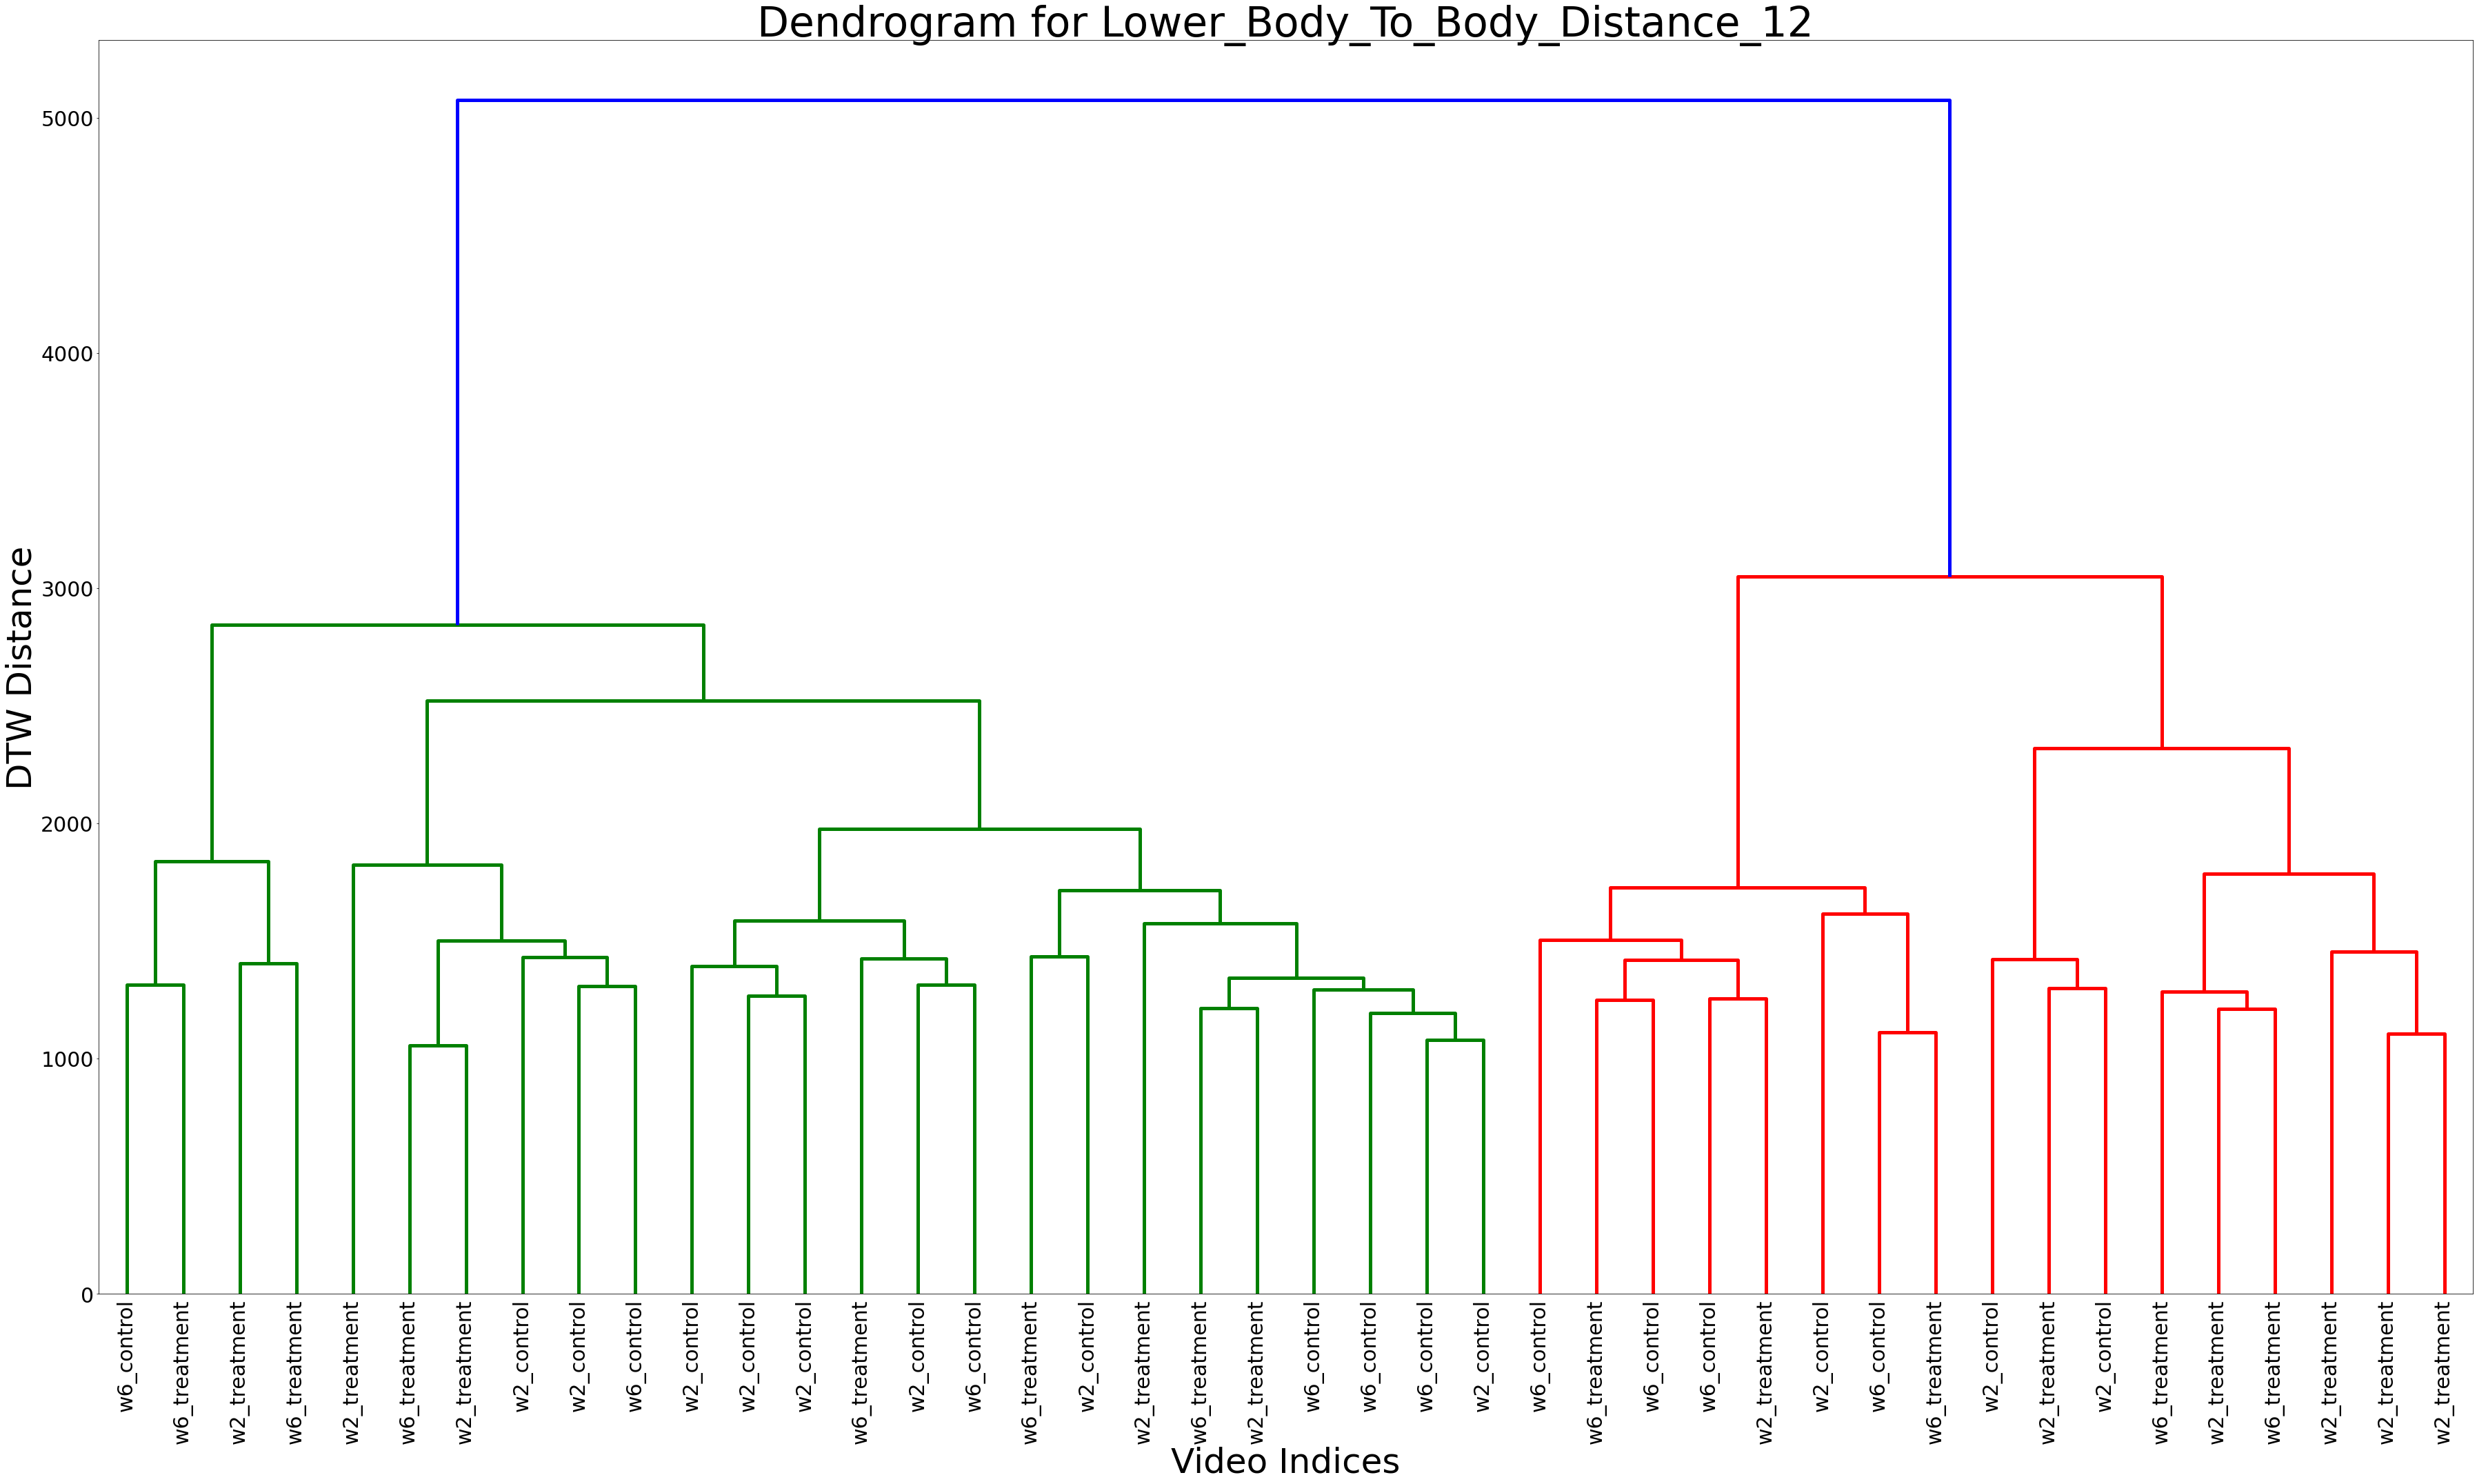

In [18]:
FEATURE = 'Lower_Body_To_Body_Distance_12'
name = f'dendrogram_for_{FEATURE}_second_dataset'
build_dendrogram(second_dataset, second_dataset_videos, name, FEATURE, save_figure=True)

### Mean Body Position Distance

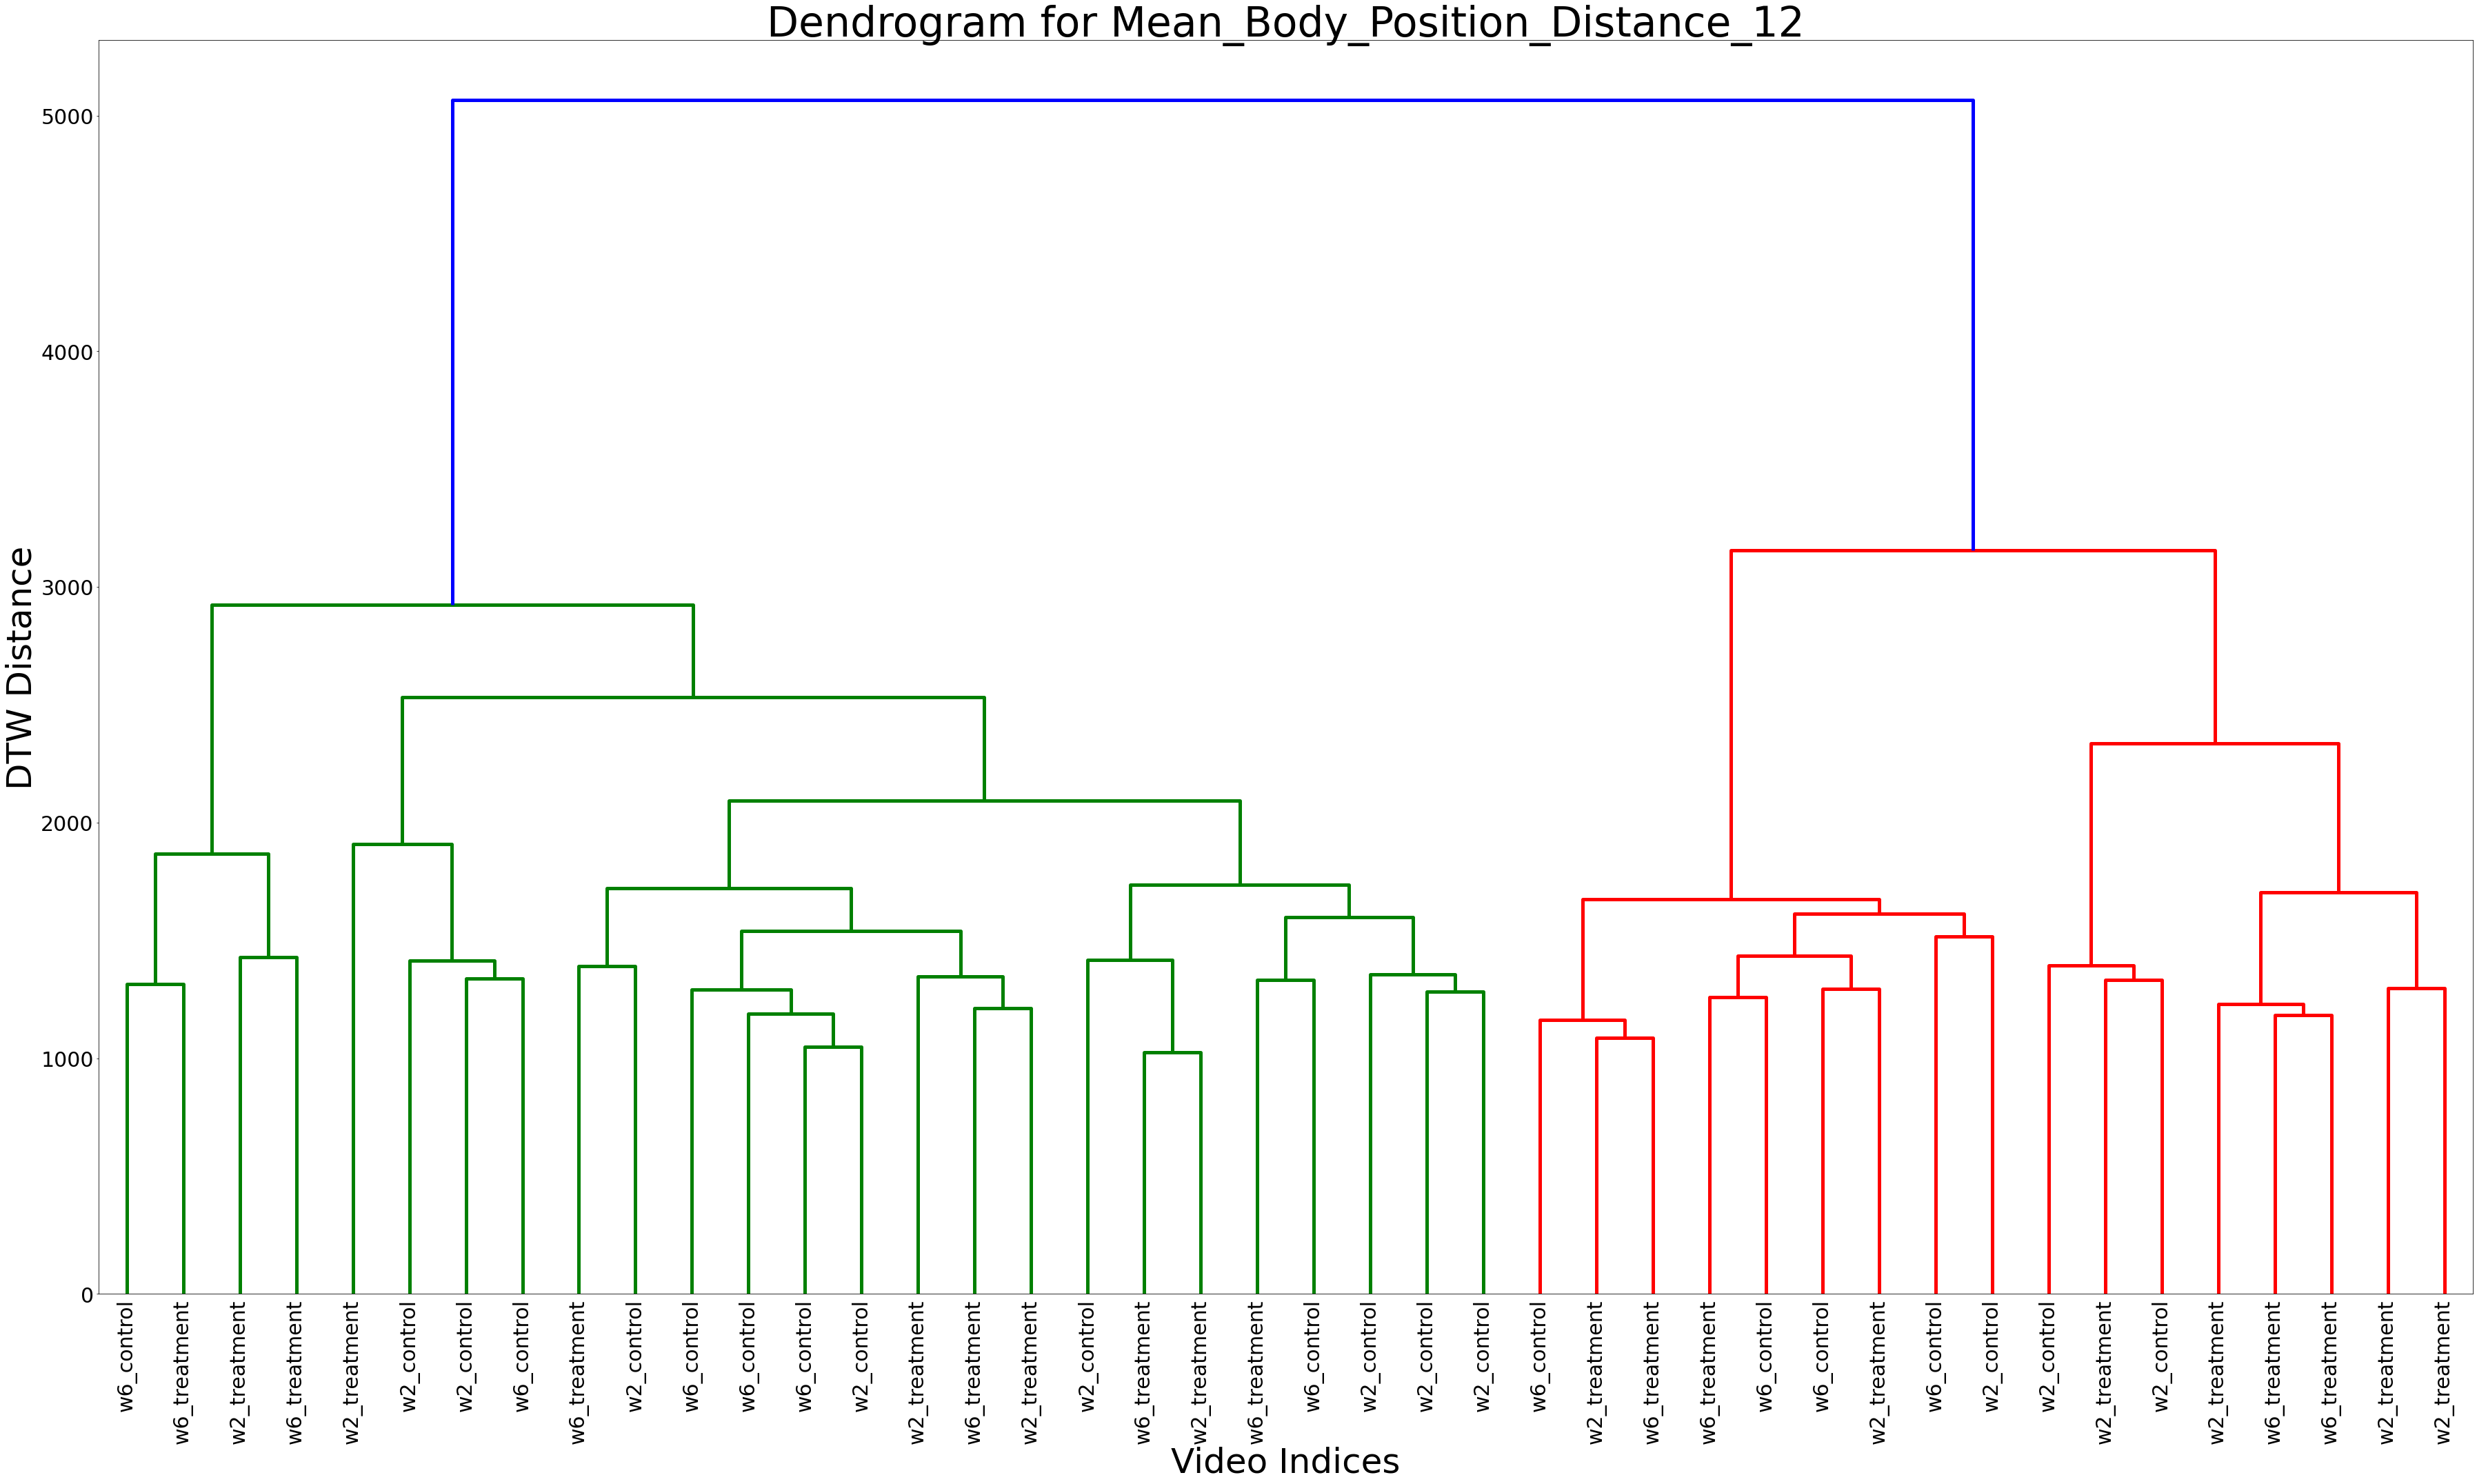

In [19]:
FEATURE = 'Mean_Body_Position_Distance_12'
name = f'dendrogram_for_{FEATURE}_second_dataset'
build_dendrogram(second_dataset, second_dataset_videos, name, FEATURE, save_figure=True)

### Nose To Nose Distance

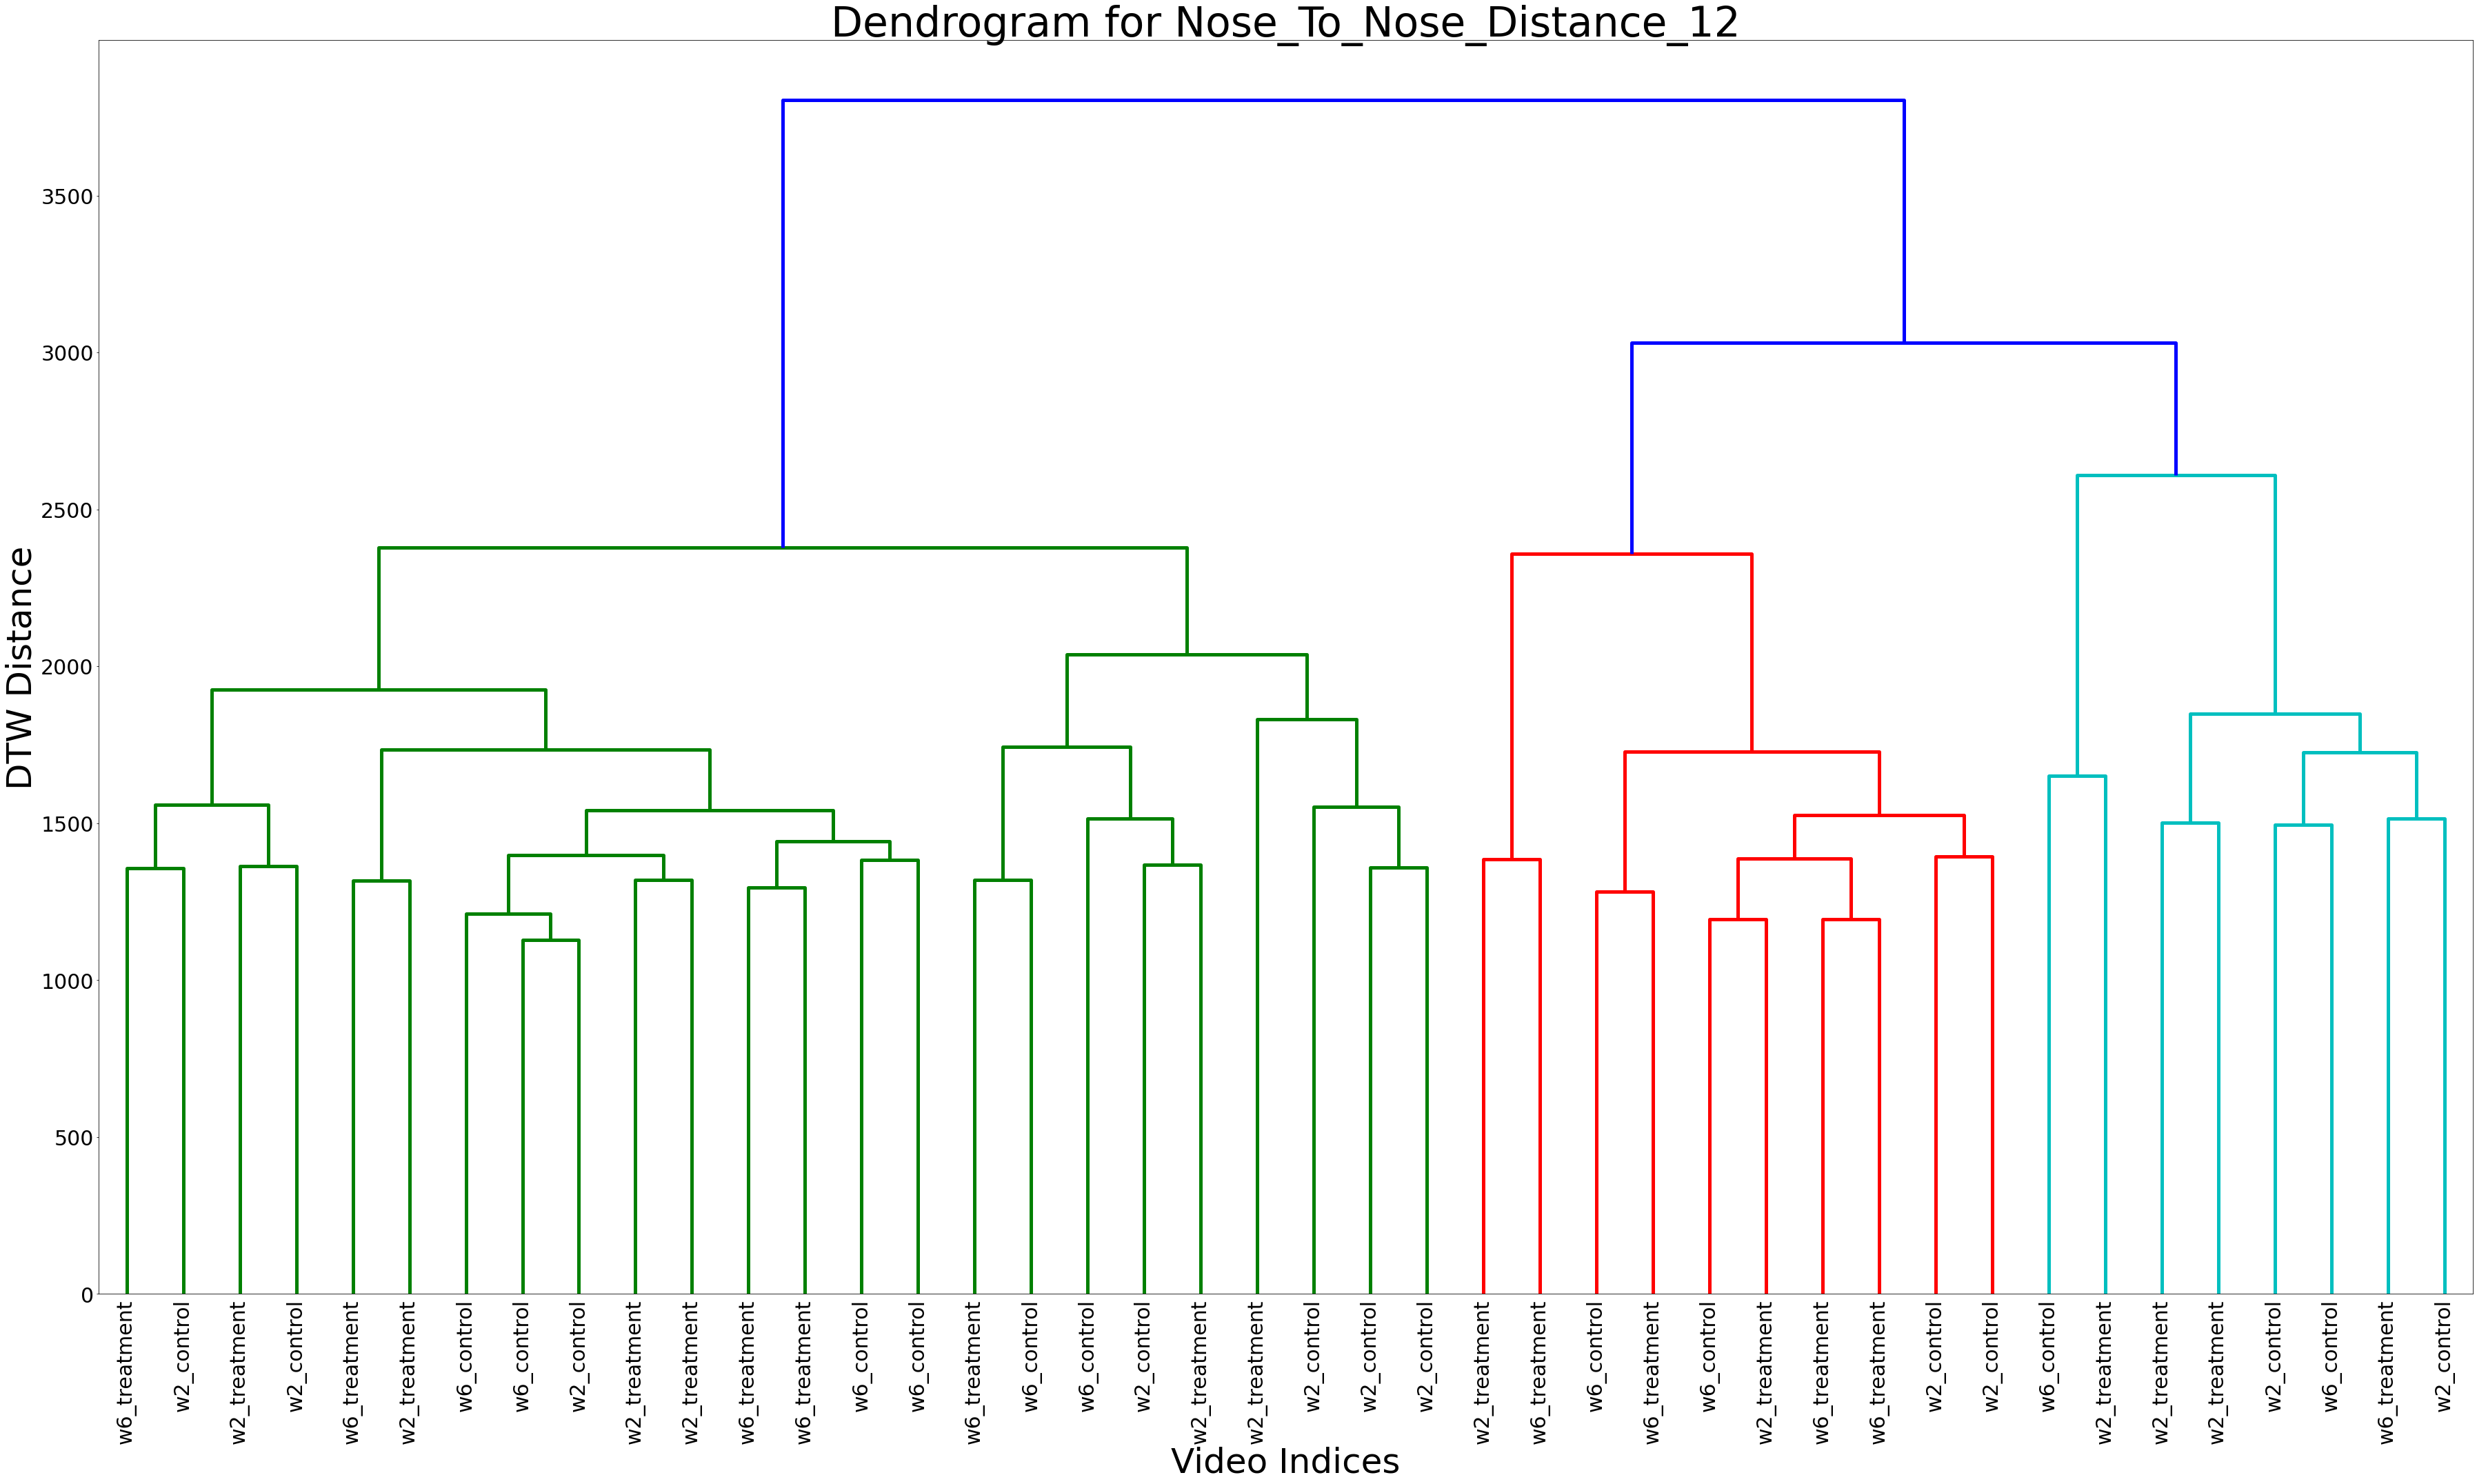

In [20]:
FEATURE = 'Nose_To_Nose_Distance_12'
name = f'dendrogram_for_{FEATURE}_second_dataset'
build_dendrogram(second_dataset, second_dataset_videos, name, FEATURE, save_figure=True)

### Nose To Body Distance

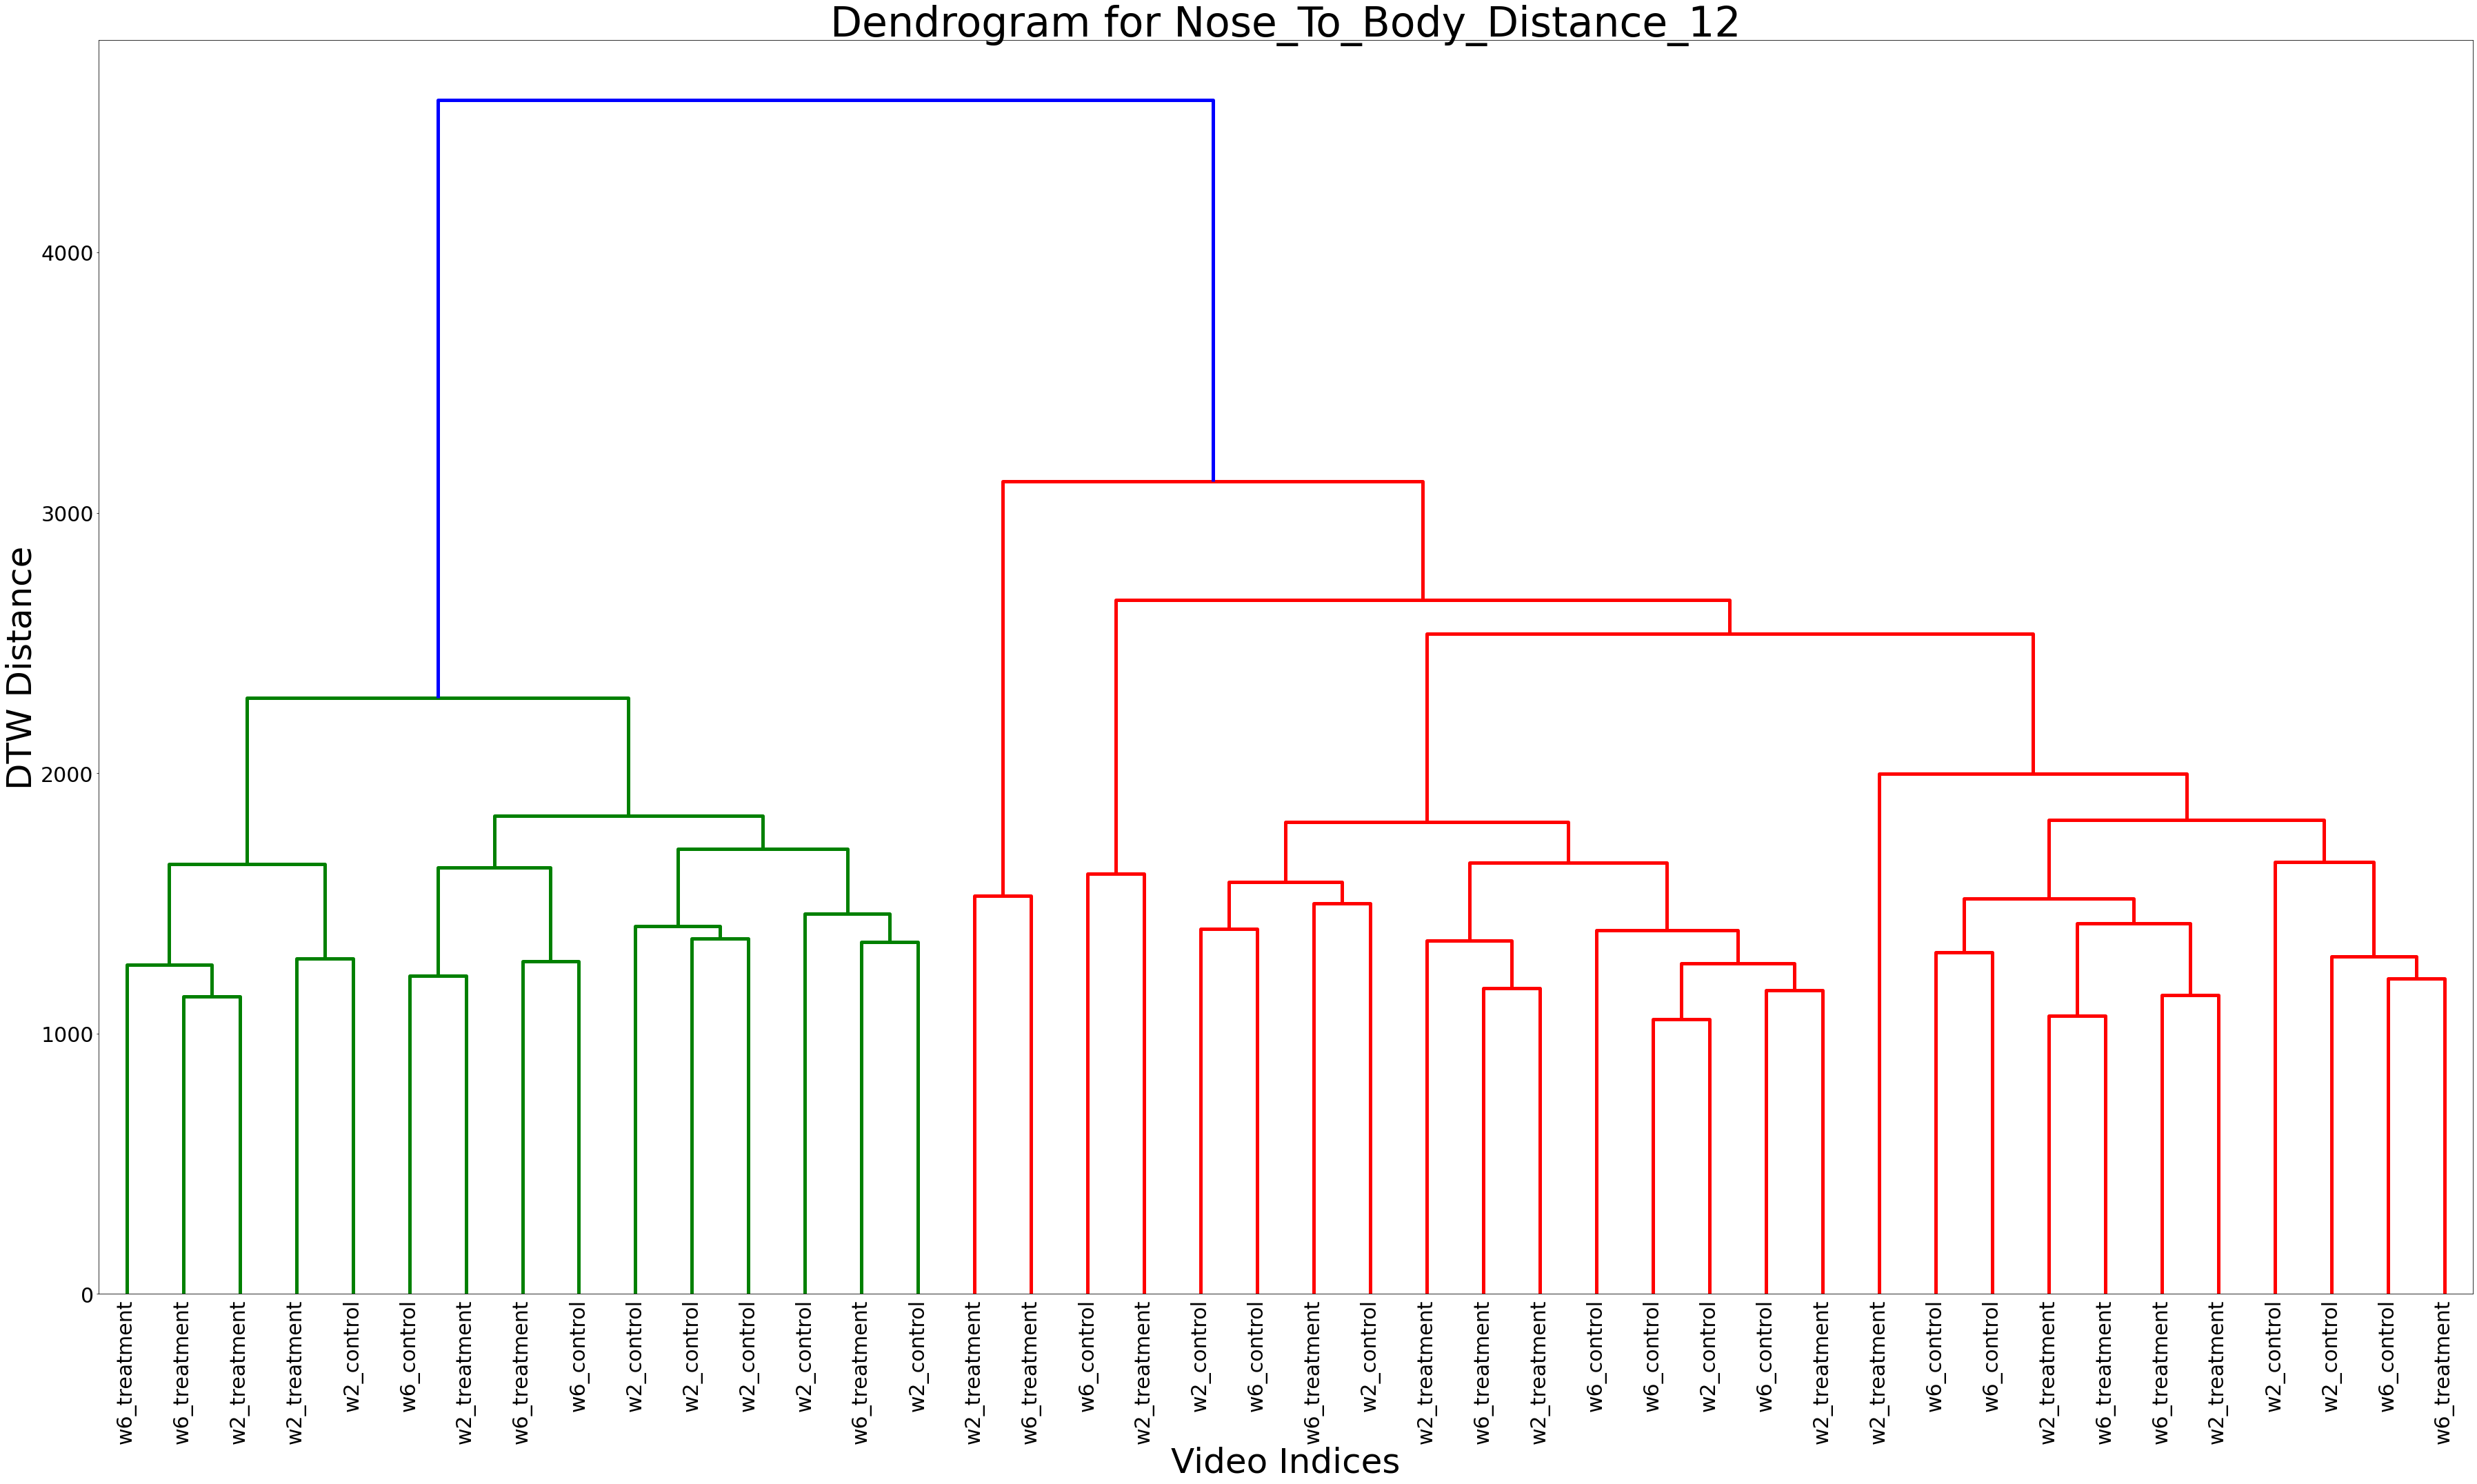

In [21]:
FEATURE = 'Nose_To_Body_Distance_12'
name = f'dendrogram_for_{FEATURE}_second_dataset'
build_dendrogram(second_dataset, second_dataset_videos, name, FEATURE, save_figure=True)

### Nose To Back Distance

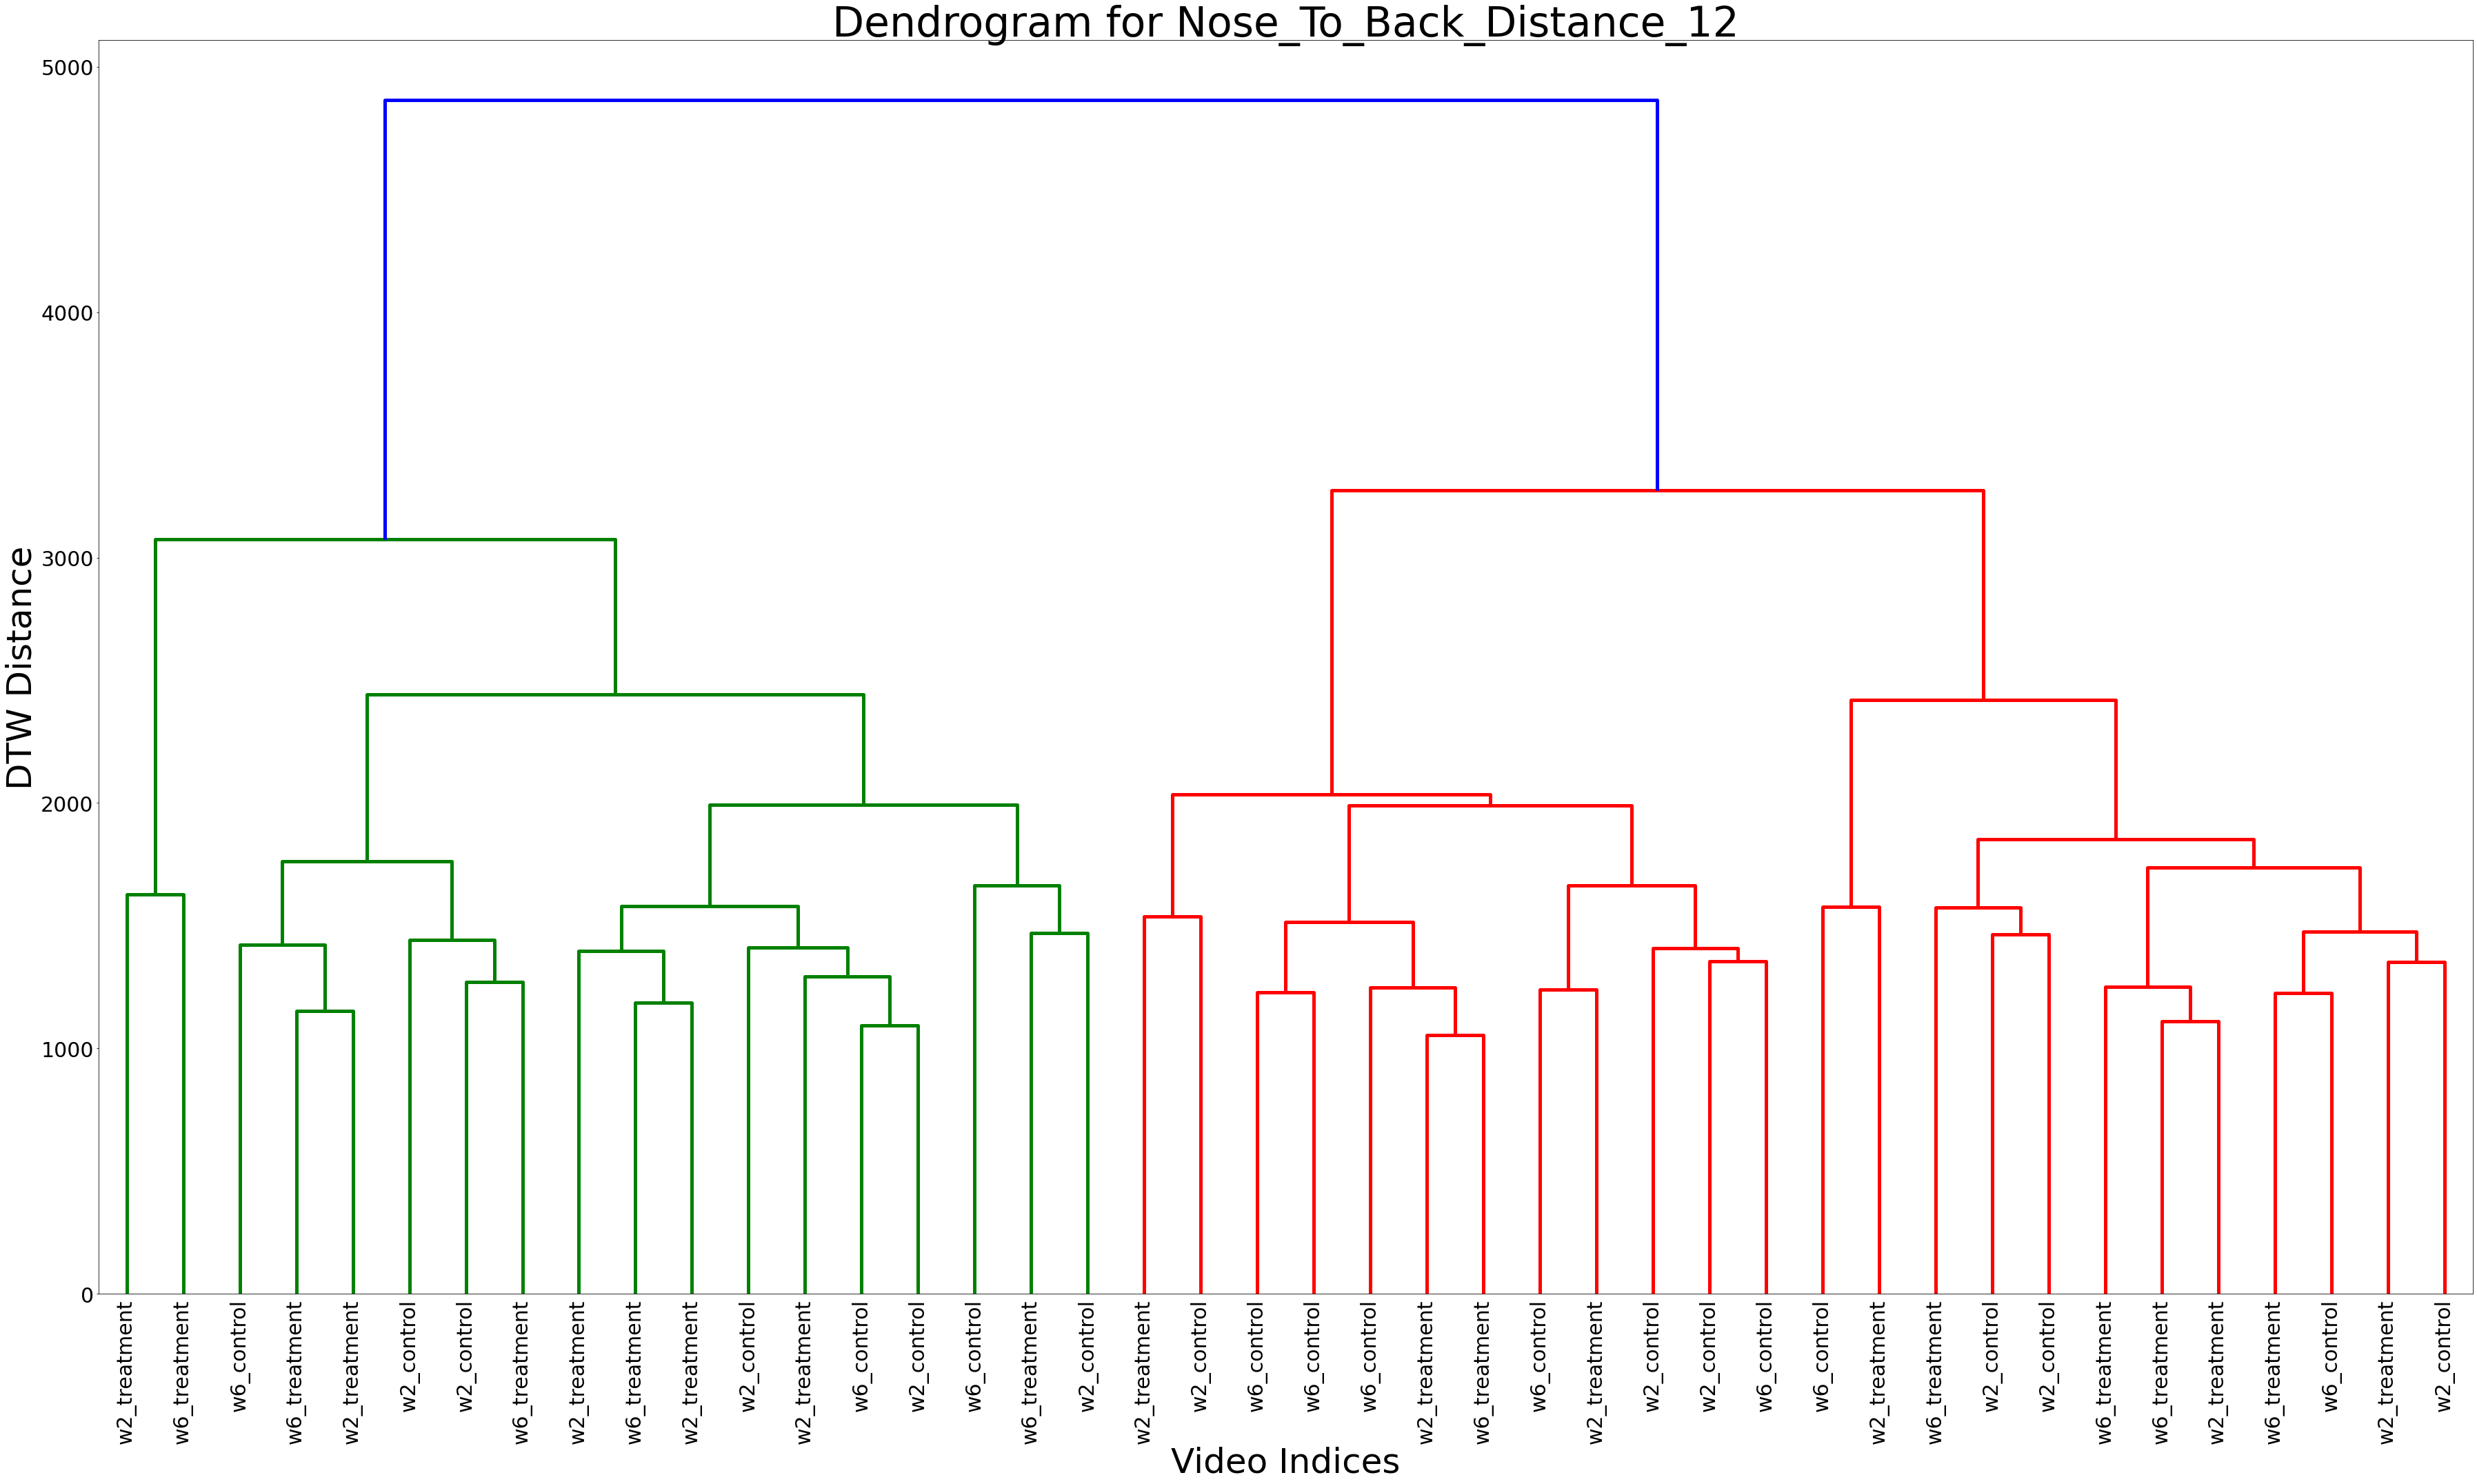

In [22]:
FEATURE = 'Nose_To_Back_Distance_12'
name = f'dendrogram_for_{FEATURE}_second_dataset'
build_dendrogram(second_dataset, second_dataset_videos, name, FEATURE, save_figure=True)

### Nose To Tail End Distance

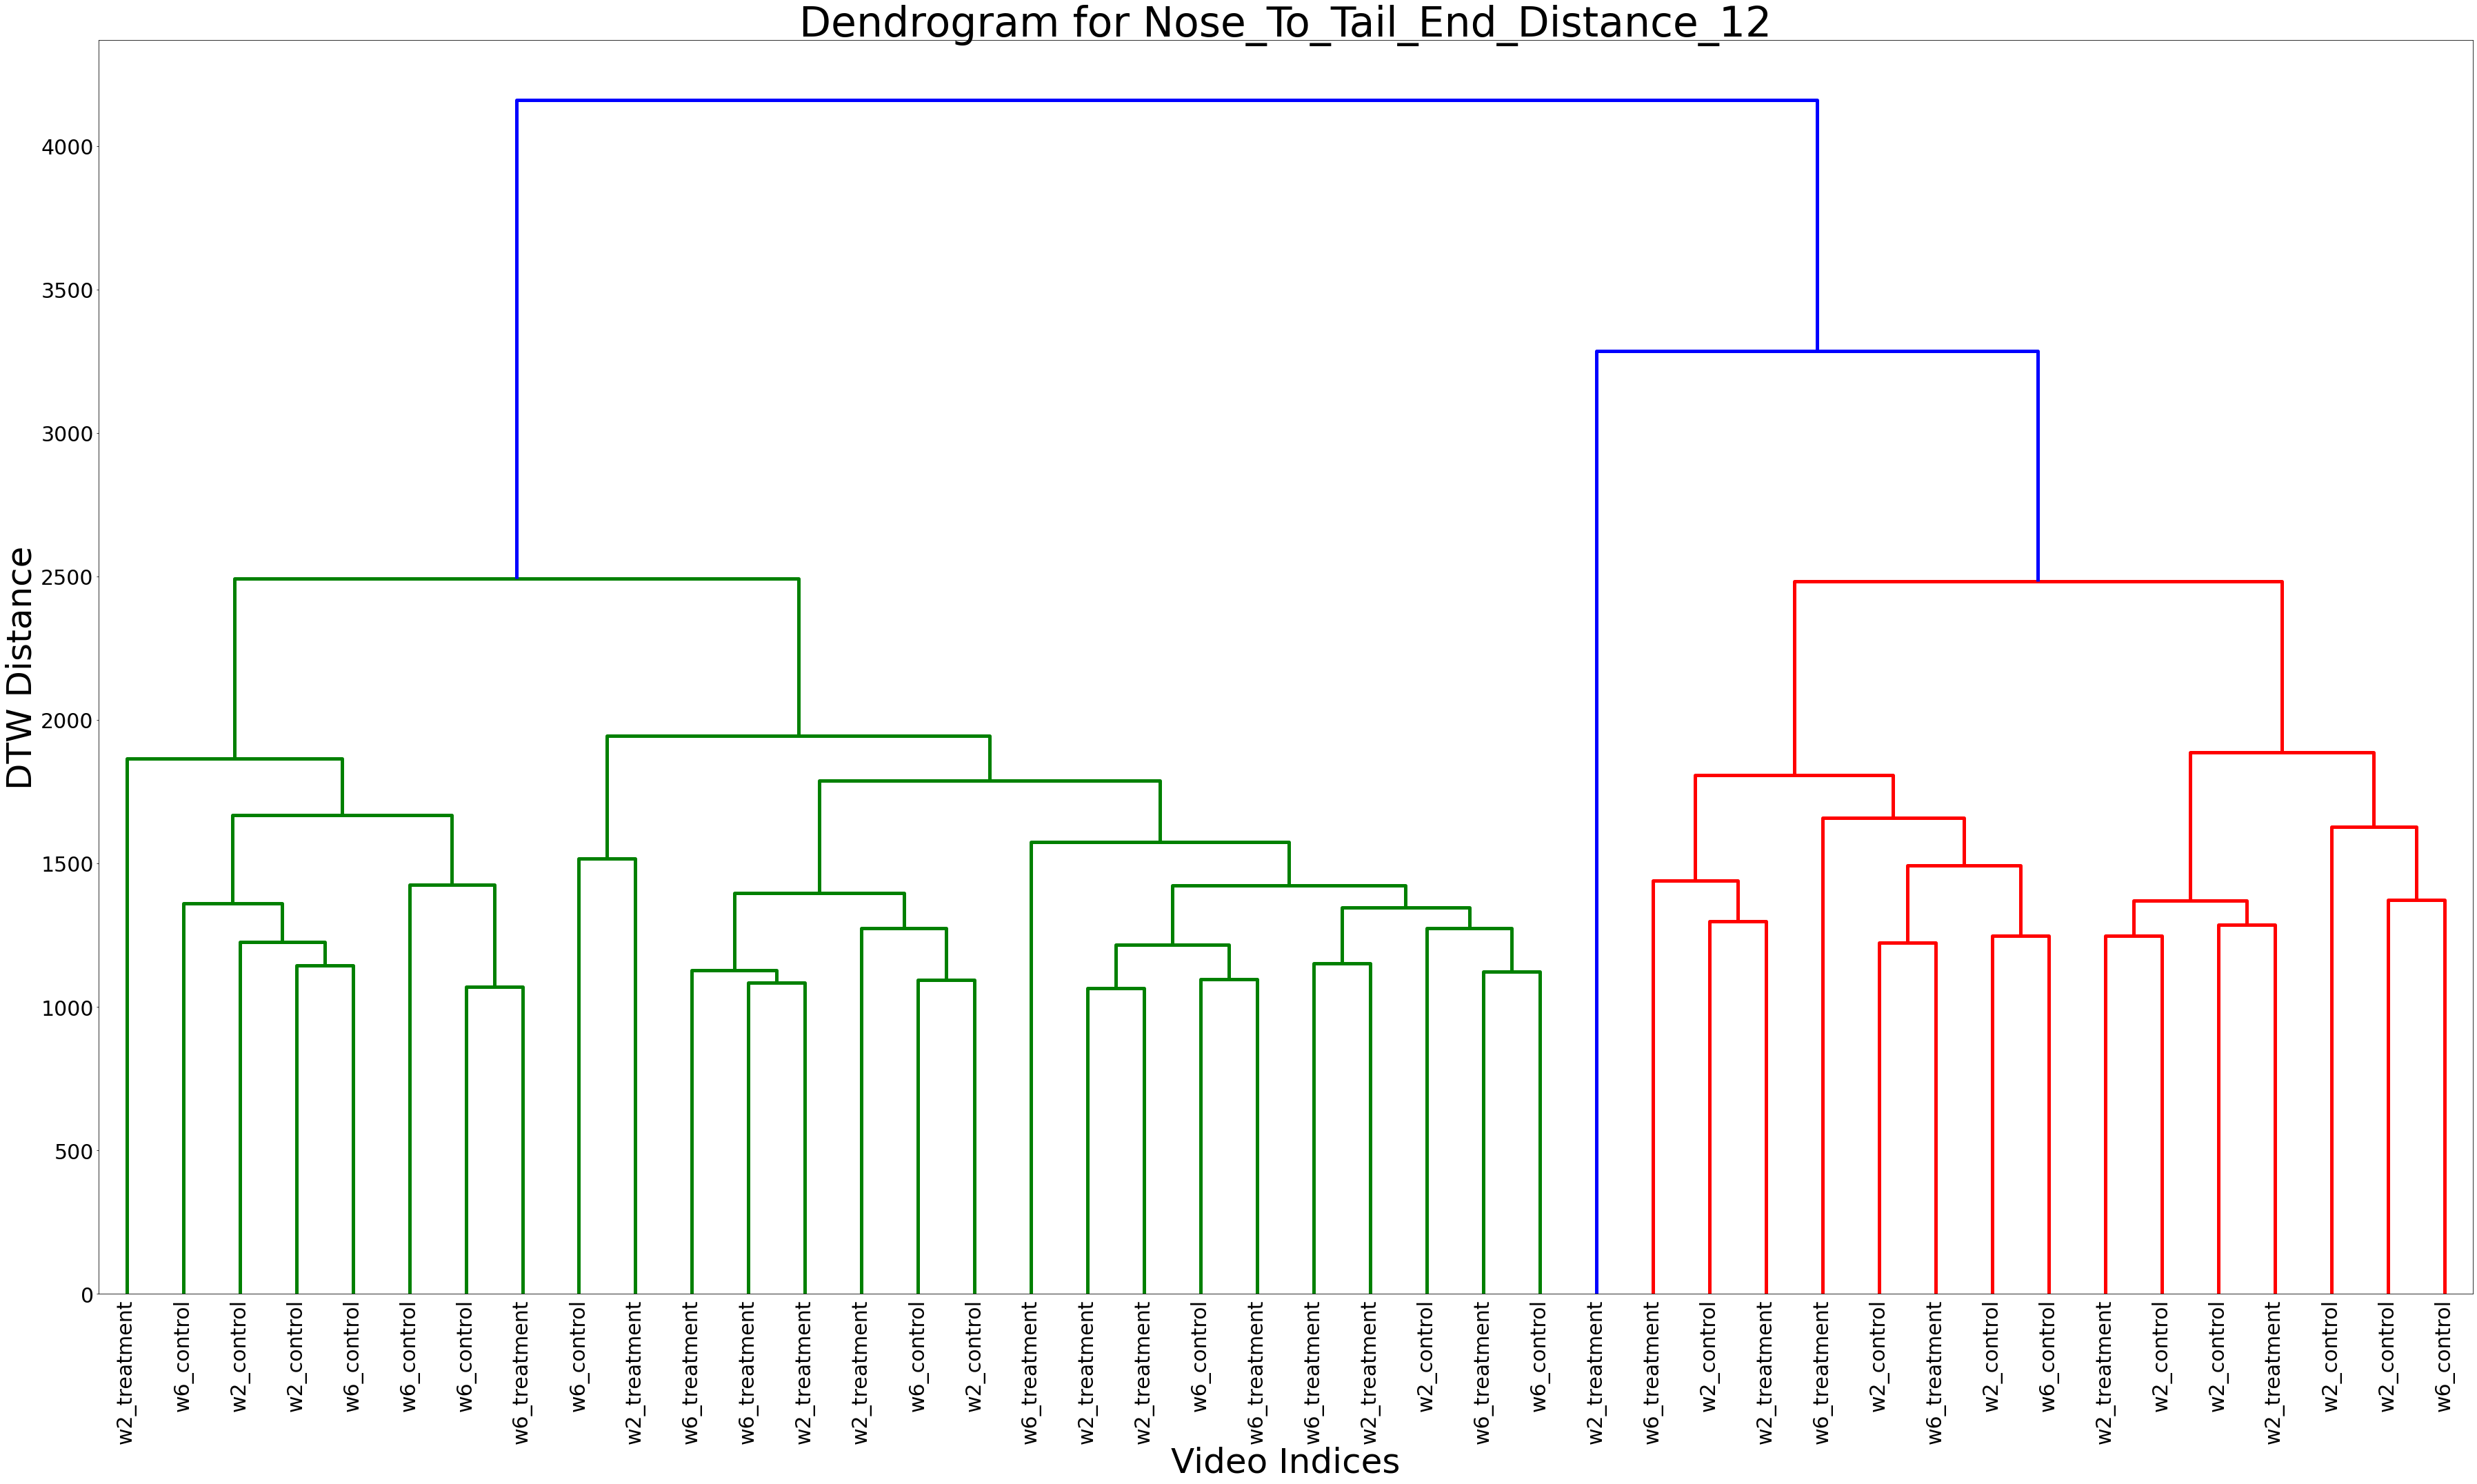

In [23]:
FEATURE = 'Nose_To_Tail_End_Distance_12'
name = f'dendrogram_for_{FEATURE}_second_dataset'
build_dendrogram(second_dataset, second_dataset_videos, name, FEATURE, save_figure=True)

### Lower Body To Body Is Close

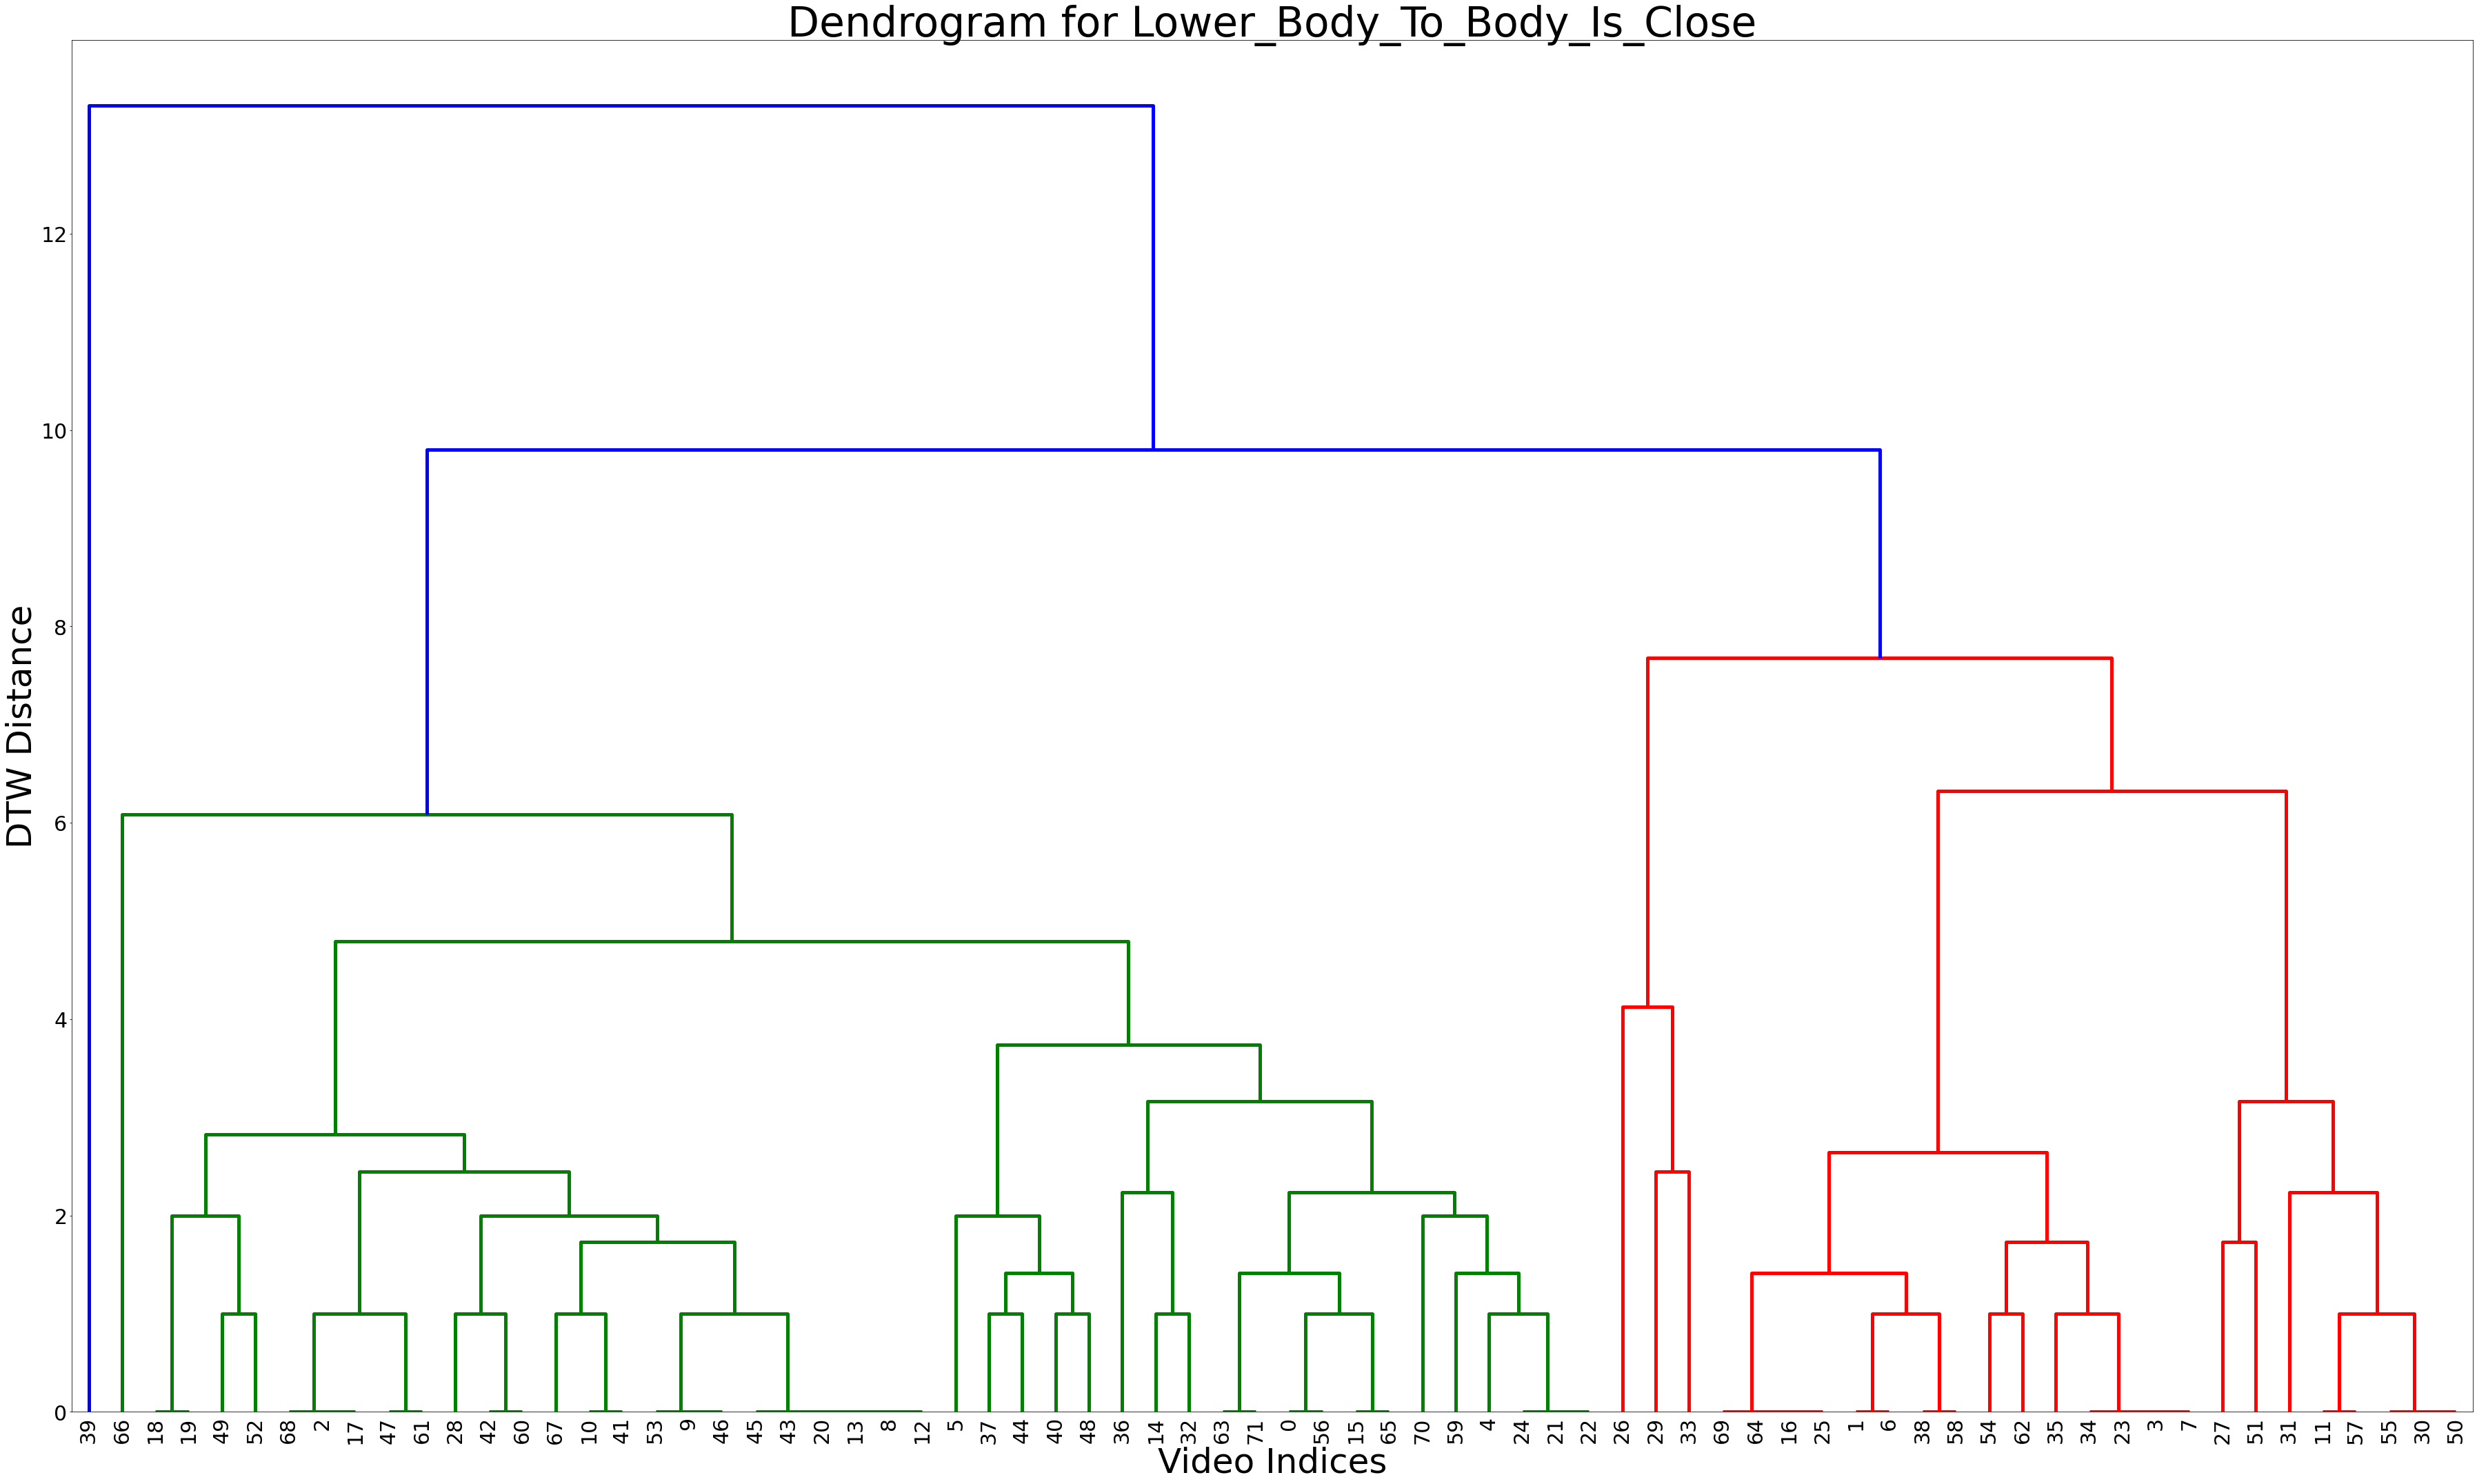

In [20]:
FEATURE = 'Lower_Body_To_Body_Is_Close'
build_dendrogram(first_dataset, FEATURE, save_figure=True)

### Mean Body Position Is Close

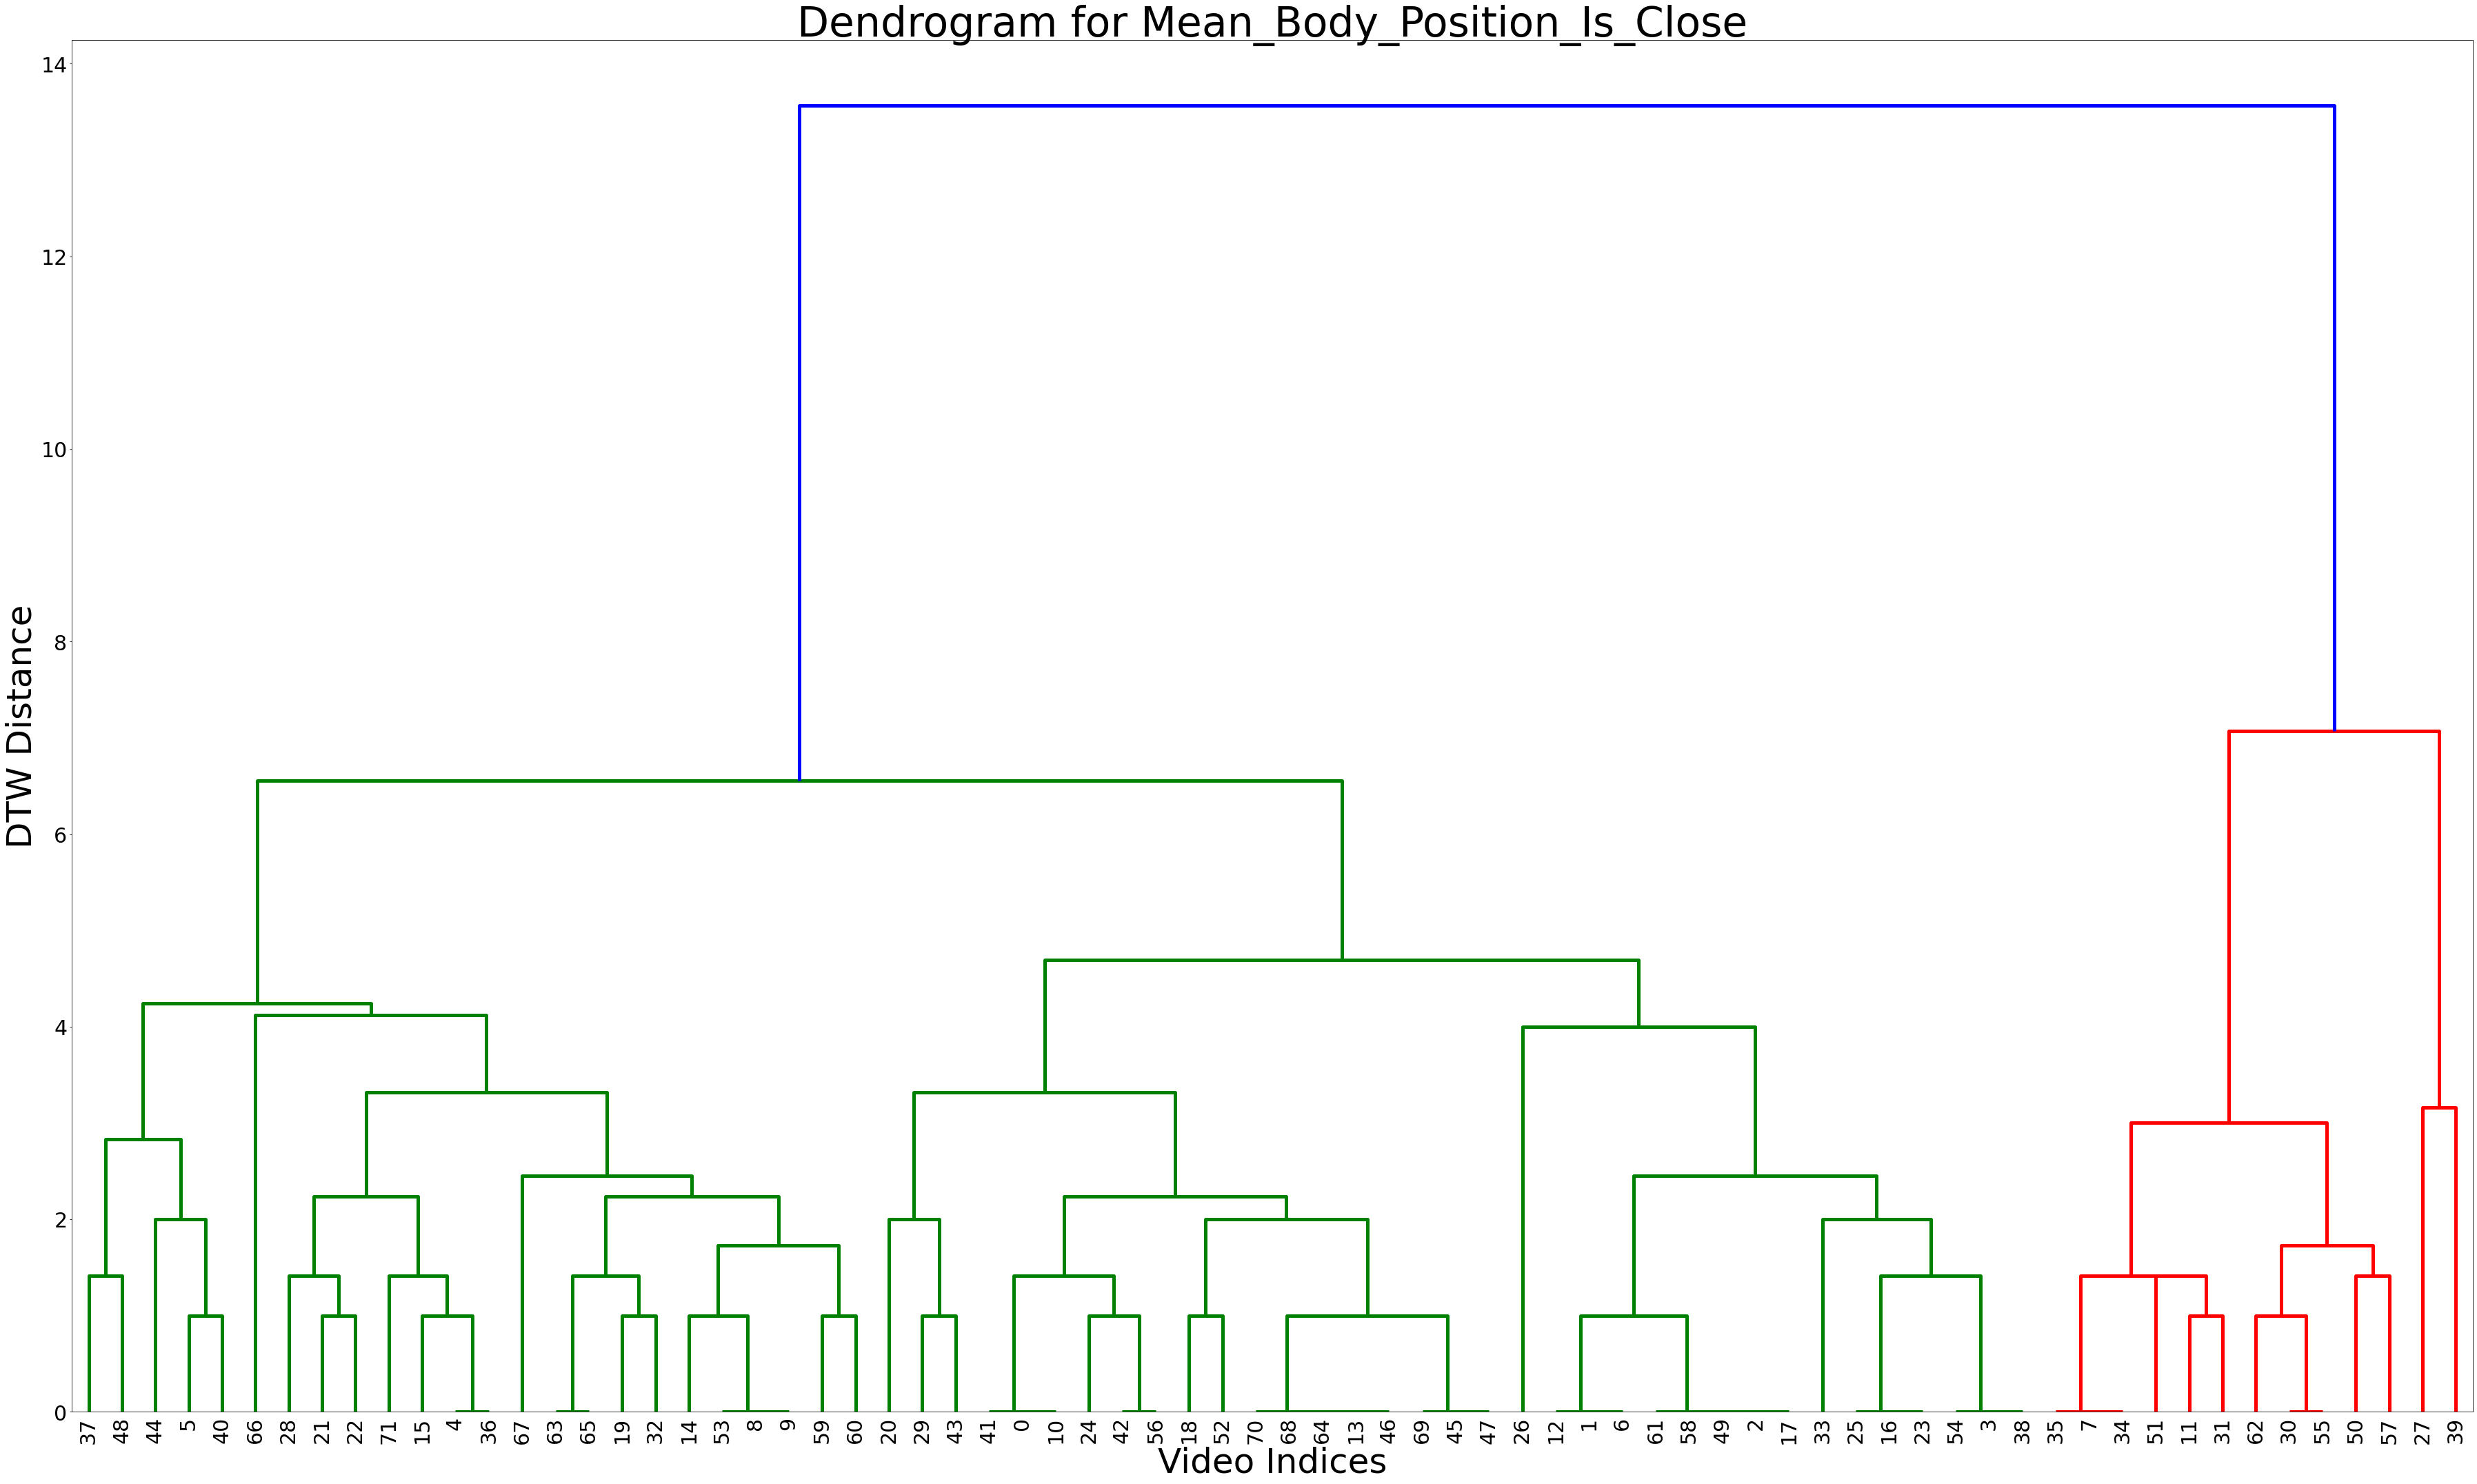

In [21]:
FEATURE = 'Mean_Body_Position_Is_Close'
build_dendrogram(first_dataset, FEATURE, save_figure=True)

### Nose To Nose Is Close

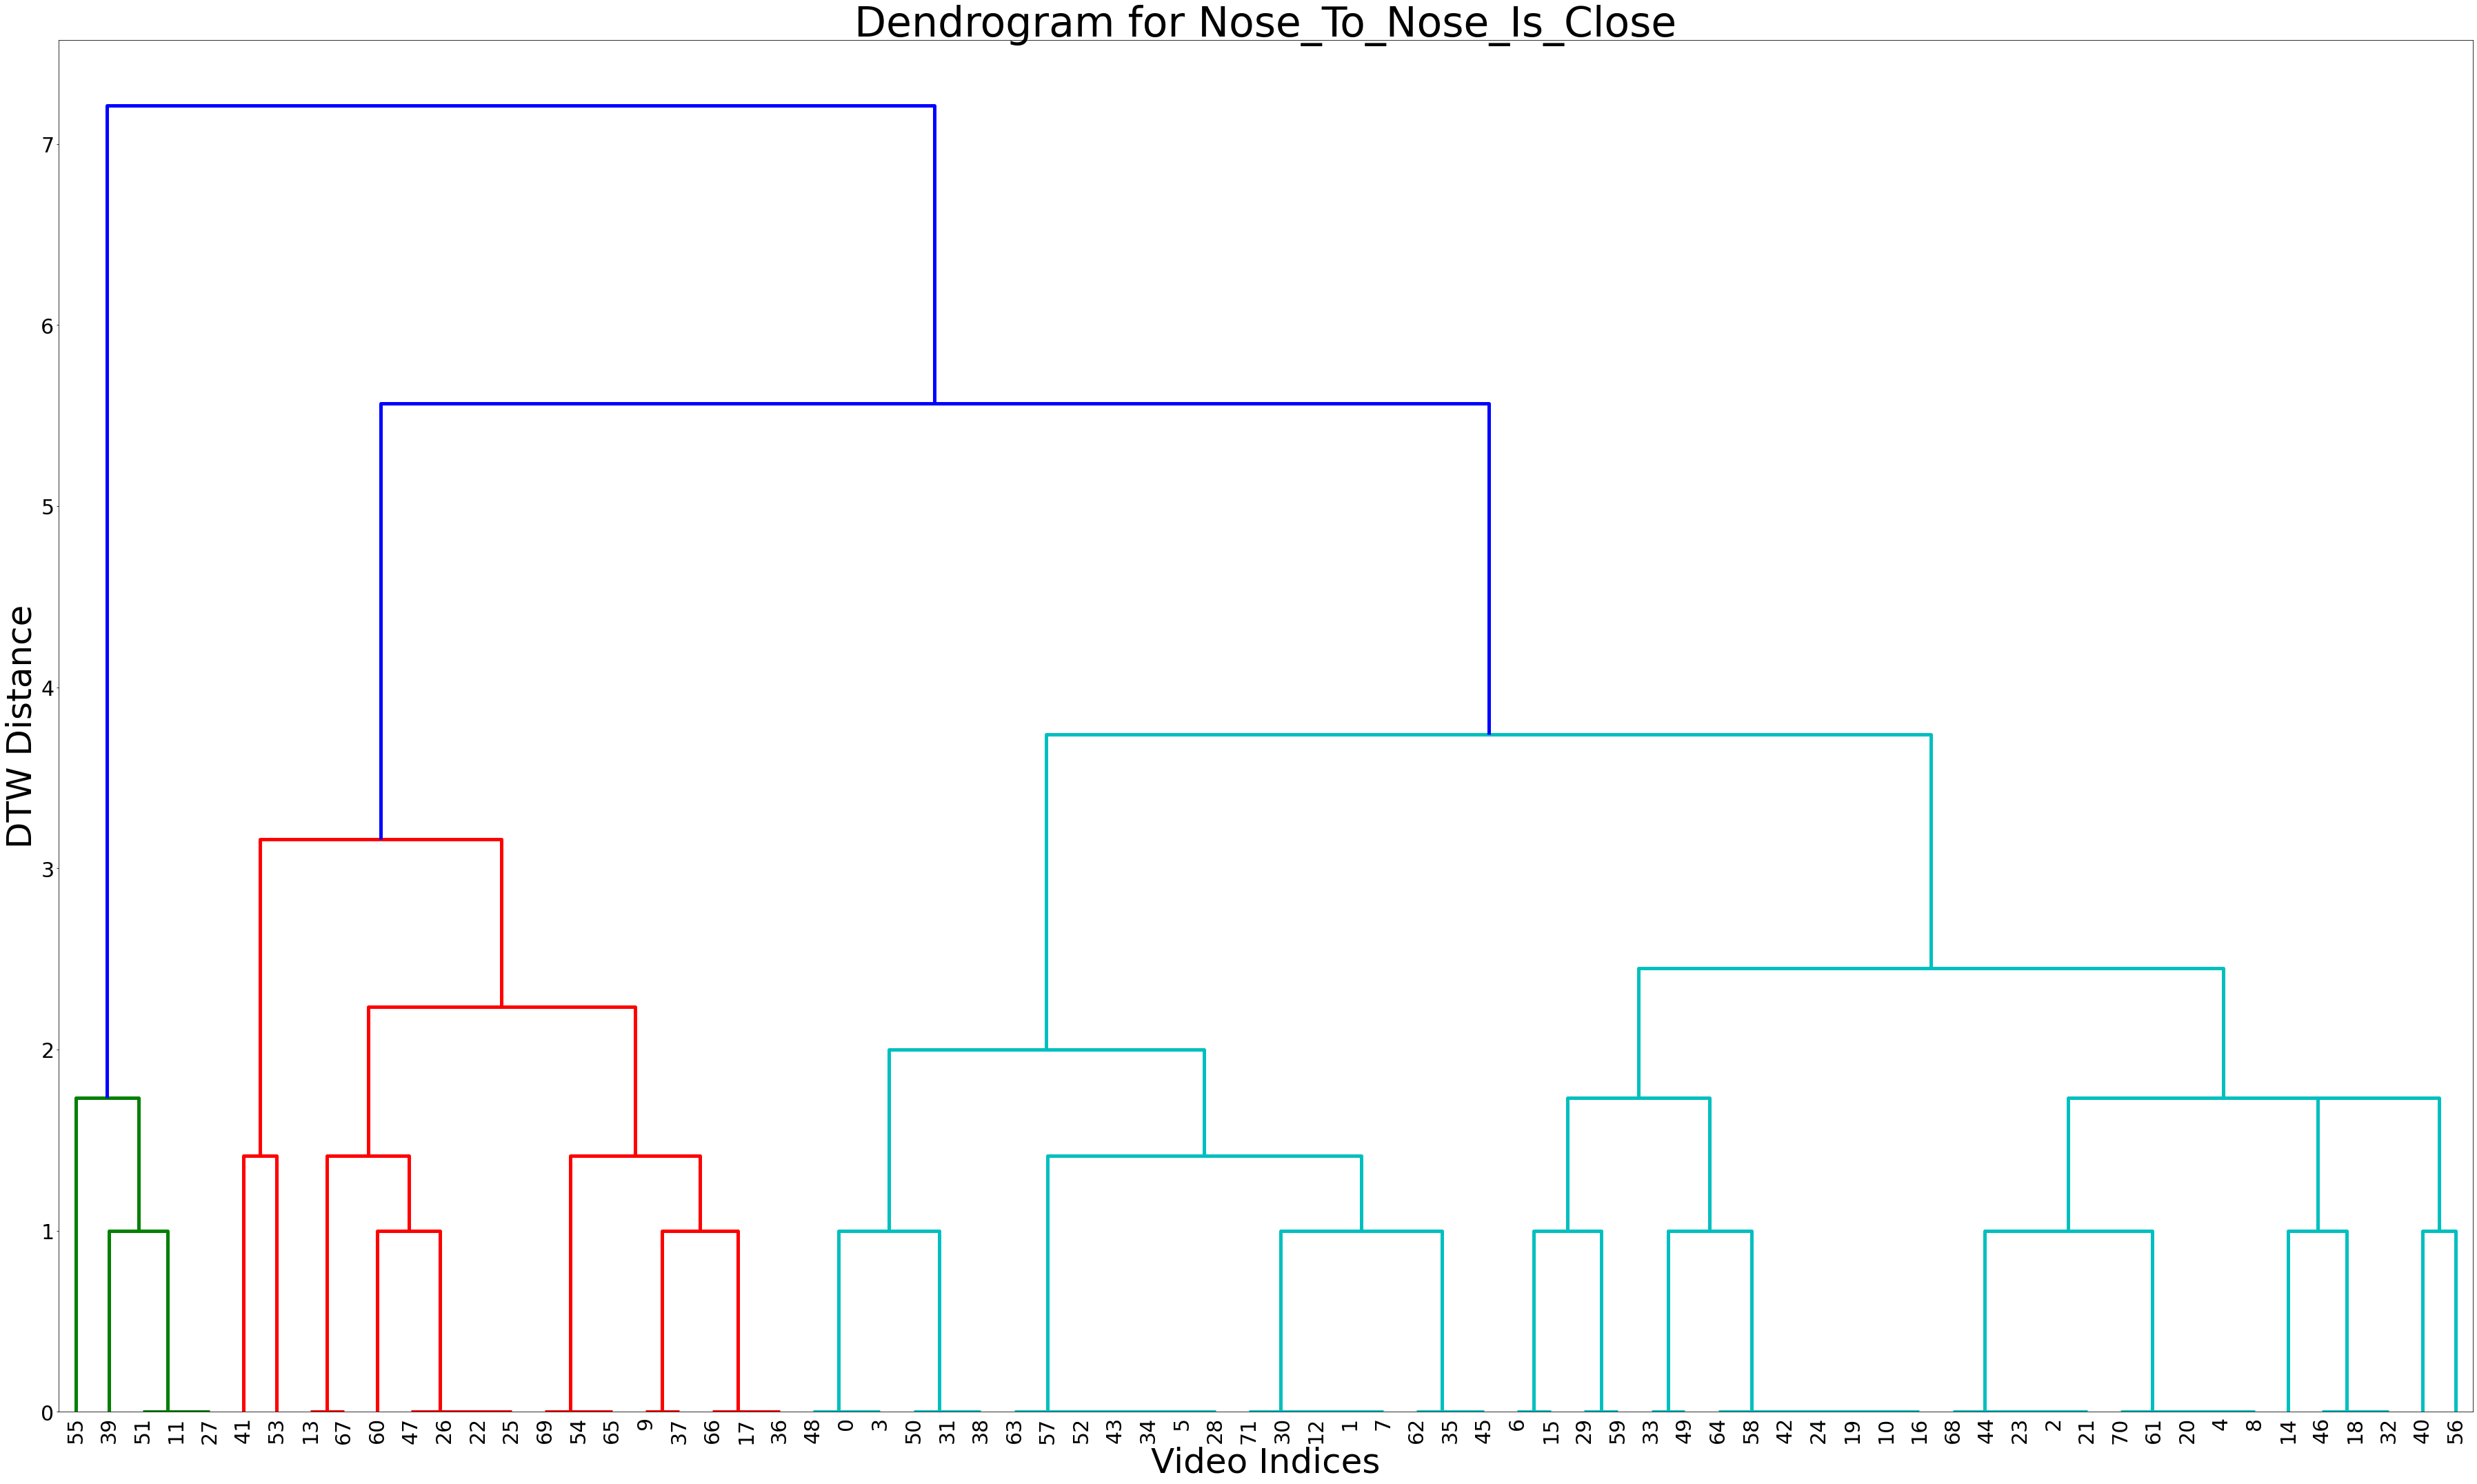

In [22]:
FEATURE = 'Nose_To_Nose_Is_Close'
build_dendrogram(first_dataset, FEATURE, save_figure=True)

### Nose To Body Is Close

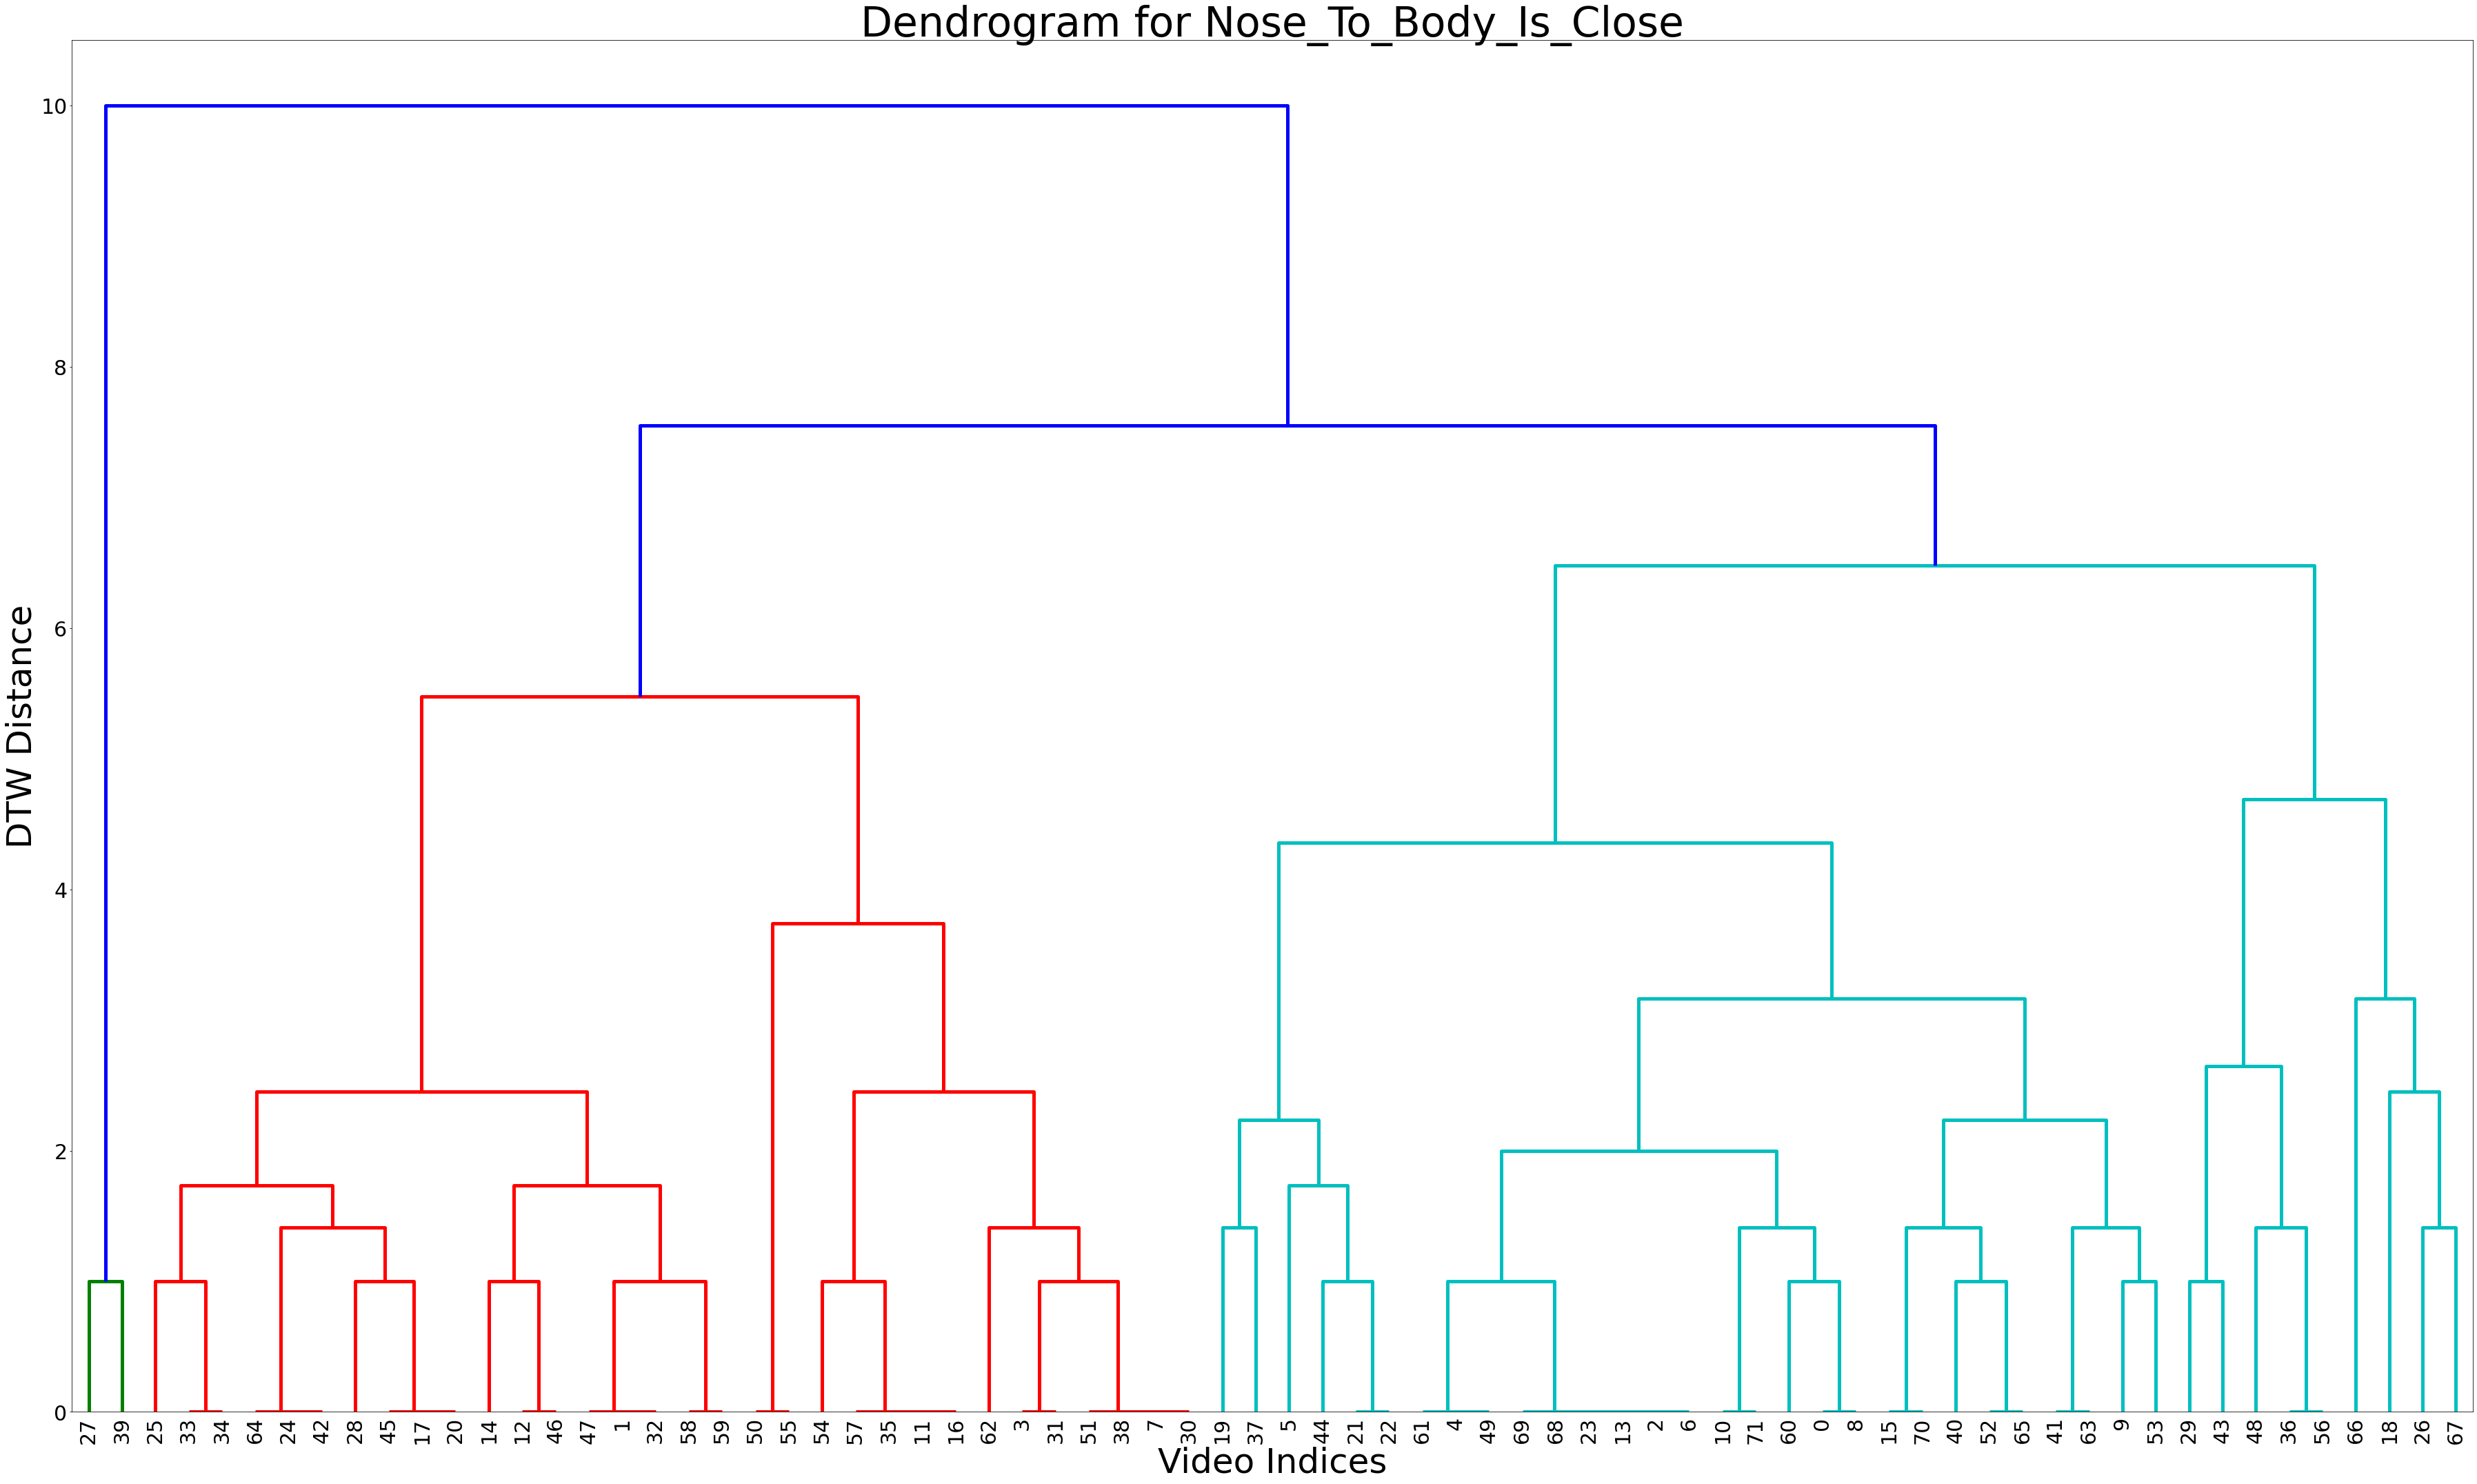

In [23]:
FEATURE = 'Nose_To_Body_Is_Close'
build_dendrogram(first_dataset, FEATURE, save_figure=True)

### Nose To Back Is Close

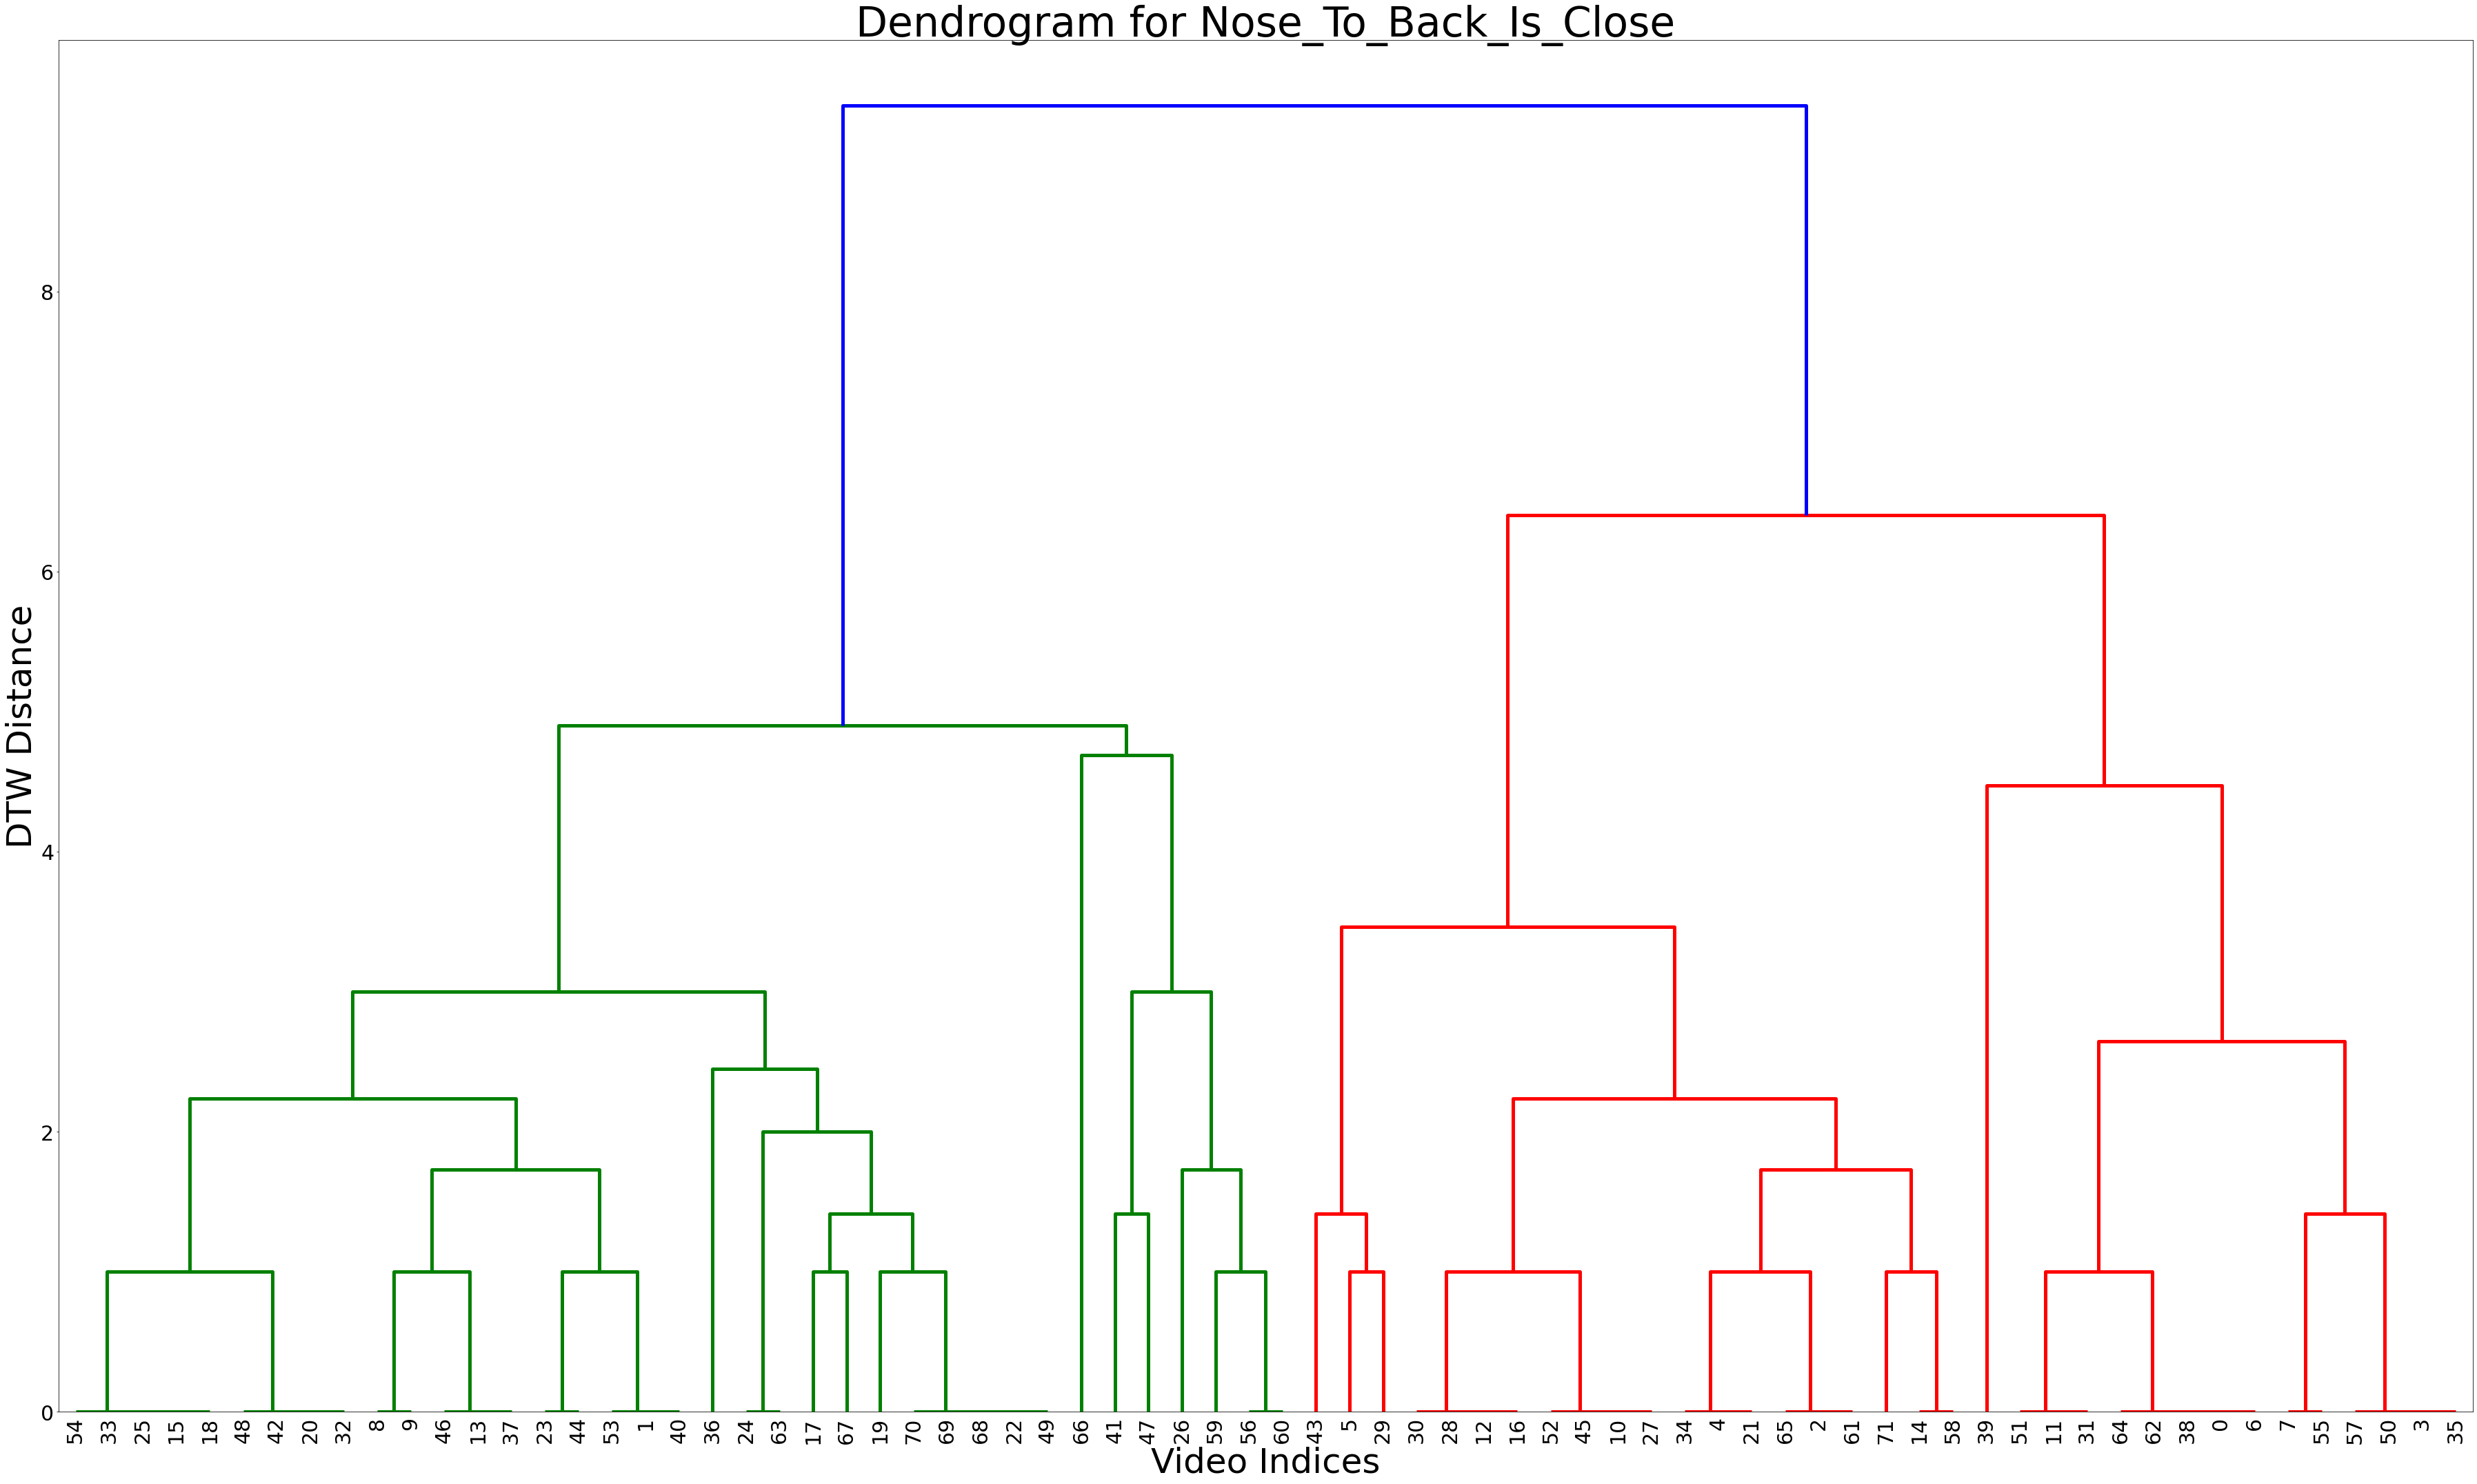

In [24]:
FEATURE = 'Nose_To_Back_Is_Close'
build_dendrogram(first_dataset, FEATURE, save_figure=True)

### Nose To Tail End

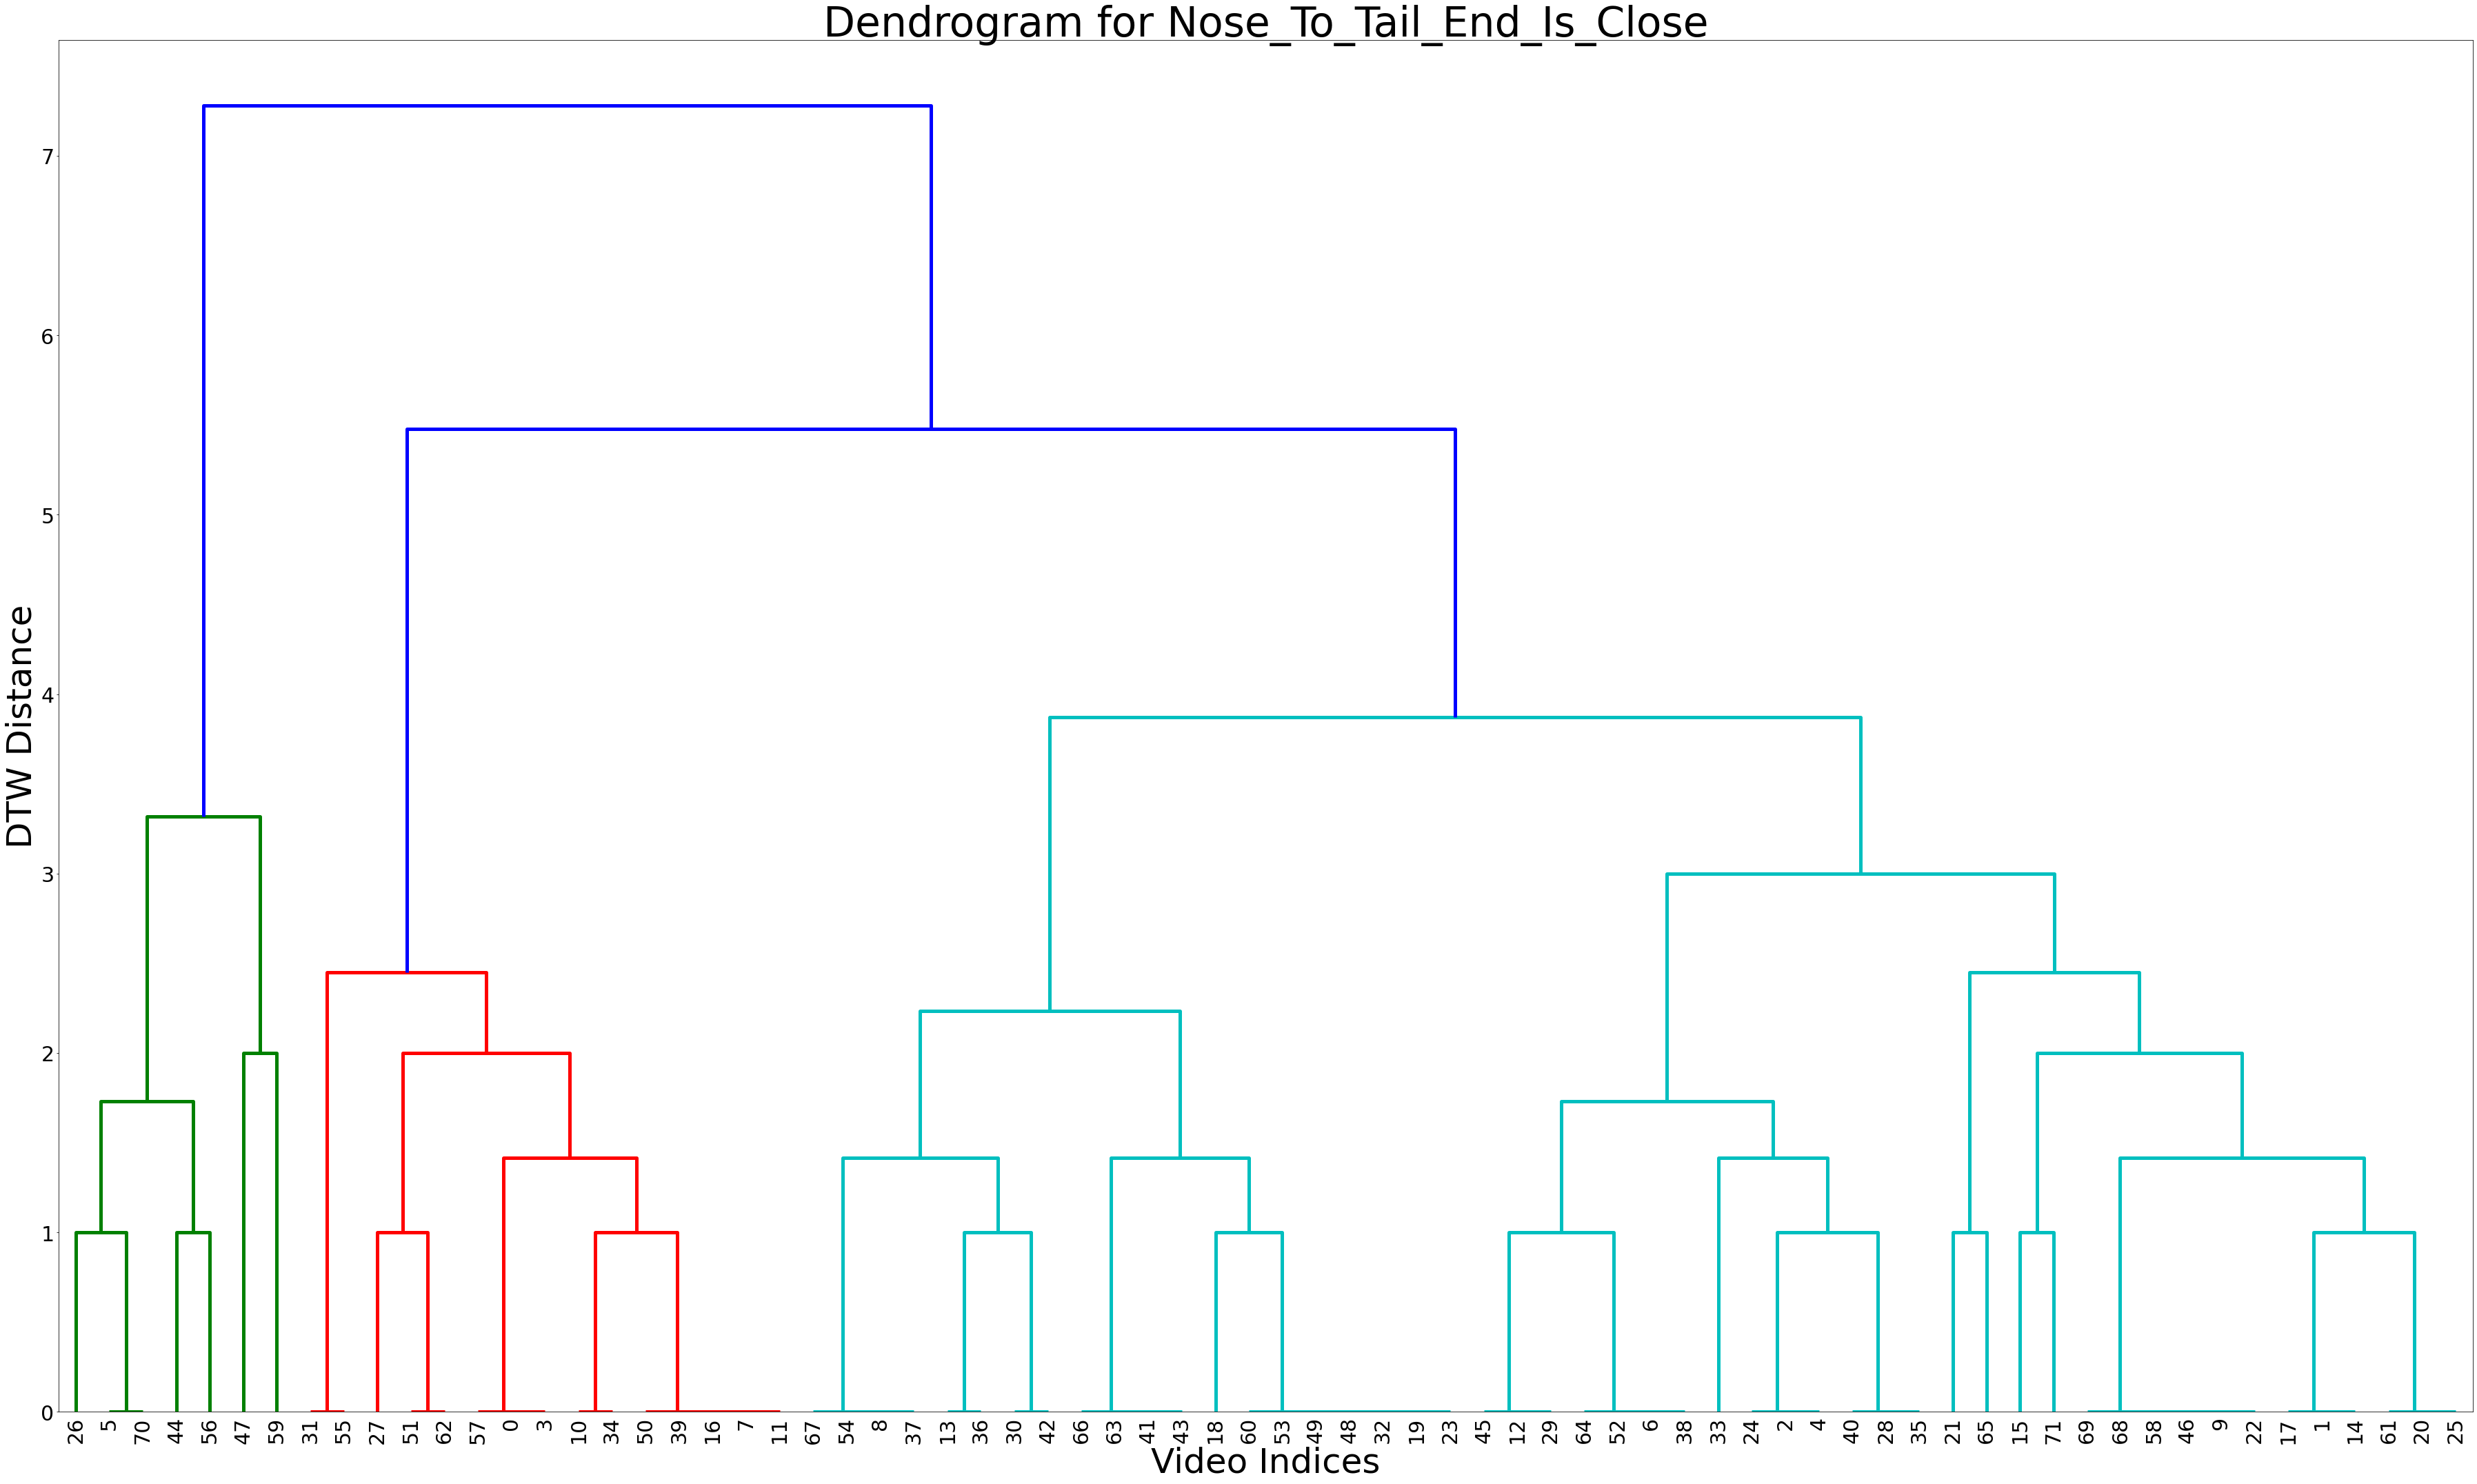

In [25]:
FEATURE = 'Nose_To_Tail_End_Is_Close'
build_dendrogram(first_dataset, FEATURE, save_figure=True)